### Context
Customer segmentation is the process of dividing a dataset of customers into groups of similar
customers based on certain common characteristics, usually for the purpose of understanding the
population dataset in a better fashion. Customer segmentation is often viewed as a means to
achieve a better return on investment from marketing efforts. Typically, the variables of interest are
customer profiles, campaign conversion rates, and information associated with various marketing
channels. Based on these feature categories, the target is to create the best possible customer
segments from the given data.

### Objective
Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective
is to come up with the best possible customer segments using the given customer dataset.

### Data Dictionary

The dataset contains the following features:
- ID: Unique ID of each customer
- Year_Birth: Customer’s year of birth
- Education: Customer's level of education
- Marital_Status: Customer's marital status
- Kidhome: Number of small children in customer's household
- Teenhome: Number of teenagers in customer's household
- Income: Customer's yearly household income
- Recency: Number of days since the last purchase
- Dt_Customer: Date of customer's enrollment with the company
- MntFishProducts: The amount spent on fish products in the last 2 years
- MntMeatProducts: The amount spent on meat products in the last 2 years
- MntFruits: The amount spent on fruits products in the last 2 years
- MntSweetProducts: Amount spent on sweet products in the last 2 years
- MntWines: The amount spent on wine products in the last 2 years
- MntGoldProds: The amount spent on gold products in the last 2 years
- NumDealsPurchases: Number of purchases made with discount
- NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be
  shipped through the mail)
- NumStorePurchases: Number of purchases made directly in stores
- NumWebPurchases: Number of purchases made through the company's website
- NumWebVisitsMonth: Number of visits to the company's website in the last month
- AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 If the customer complained in the last 2 years, 0 otherwise

In [1]:
# Loading Libraries for reading and manupulating data

import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist

# To perform K-means clustering and compute Silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To visualize the elbow curve and Silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Importing PCA
from sklearn.decomposition import PCA

# To encode the variable
from sklearn.preprocessing import LabelEncoder

# Importing TSNE
from sklearn.manifold import TSNE

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# To compute distances
from scipy.spatial.distance import pdist

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN
from sklearn.cluster import DBSCAN

# To import Gaussian Mixture
from sklearn.mixture import GaussianMixture

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
### Loading the Data
data= pd.read_csv('marketing_campaign.csv')

In [3]:
# Printing the shape of the data
data.shape

(2240, 27)

#### **Understand the data by observing a few rows**

In [4]:
data.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [5]:
data.tail(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
2235         1  13-06-2013       46       709  ...                    3   
2236         1  10-06-2014       56       406  ...                    2   
2237         0  25-01-2014       91       908  ...                    3   
2238         1  24-01-2014        8       428  ...                    5   
2239         1  15-10-2012       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[5 rows x 27 columns]

#### Let us check the data types and and missing values of each column

In [6]:
#Checking how many null values are present with each of the columns
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Here ID columns is not null but there is no usage of it so we will delete that column.All other columns except Income is not null.

In [7]:
# Checking the information of all the columns of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Majority of the columns are int or float except Education, Marital_Status and Dt_Customer. Education and Marital_Status  are categorical variables. Dt_Customer is a date variable which could be used in calculating the no of years of association a customer is having with the particular company or its services. 

In [8]:
# Types of educational background of people:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [9]:
#Types of Marital status of people:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [10]:
data.drop('ID', axis= 1)

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0     04-09-2012       58       635         88  ...                   10   
1     08-03-2014       38        11          1  ...                    1   
2     21-08-2013       26       426         49  ...                    2   
3     10-02-2014       26        11          4  ...                    0   
4     19-01-2014       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2235  13-06-2013       46       709         43  ...                    3   
2236  10-06-2014       56       406          0  ...                    2   
2237  25-01-2014       91       908         48  ...                    3   
2238  24-01-2014        8       428         30  ...                    5   
2239  15-10-2012       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2235             0             0             0         0         0  
2236             0             1             0         0         0  
2237             0             0             0         0         0  
2238             0             0             0         0         0  
2239             0             0             0         0         1  

[2240 rows x 26 columns]

### Exploratory Data Analysis

- Let us categorise variables into numerical and categorical variables. Then explore the summary statistics of all the numerical variables.

In [11]:
cat_cols= ['Education','Marital_Status', 'Kidhome', 'Teenhome', 'Complain']

**Number of unique observations in each categorical column**

In [12]:
#Finding the weight percent of each sub-category in a given categoricalvariable
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(normalize=True))
    print("*" * 50)

Unique values in Education are :
Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
**************************************************
Unique values in Marital_Status are :
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
**************************************************
Unique values in Kidhome are :
0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64
**************************************************
Unique values in Teenhome are :
0    0.516964
1    0.459821
2    0.023214
Name: Teenhome, dtype: float64
**************************************************
Unique values in Complain are :
0    0.990625
1    0.009375
Name: Complain, dtype: float64
**************************************************


### Observations:
1. There are some sub-categories in marital status and education which can be combined with other sub-categories.
2. Example in Education Master and 2n Cycle can be combined together.
3. Similarly in Marital_status: Alone, Absurd and YOLO can be combined with Single
4. In Complain coumns 90% of people have not complanied

In [13]:
# Replace the category "2n Cycle" with the category "Master"

data["Education"].replace('2n Cycle', 'Master', inplace= True)

In [14]:
data.Education.value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

In [15]:
# Replace the category Alone, Absurd and YOLO with the category "Single" using replace(old_substring. new_substring, inplace= True) function

data["Marital_Status"].replace('Alone', 'Single', inplace= True)
data["Marital_Status"].replace('Absurd', 'Single', inplace= True)
data["Marital_Status"].replace('YOLO', 'Single', inplace= True)

In [16]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

### **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

### 1. Numerocal Columns:

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(12,8), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    print('Skew:',round(feature.skew(),2))
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='cyan') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="pastel") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    #ax_box2.annotate(np.median(feature), (np.median(feature),-1),size=12)
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='black', linestyle='-') # Add median to the histogram

Skew: 6.76


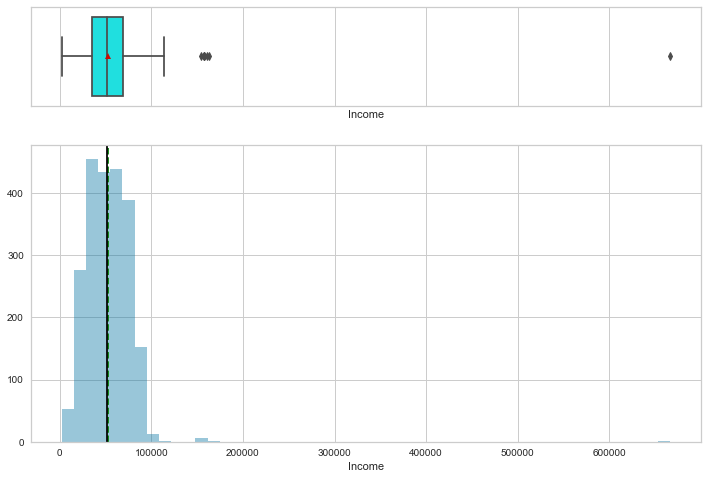

In [18]:
#### Using the above function, let's first analyze the Histogram and Boxplot for Income
histogram_boxplot(data['Income'])

#### Observation:
1. We can see some outliers beyond the Income of 0.1 million dollars.
2. The mean value of income is 0.05 mn dollars and the curve is highly righly skewed. This could be due to the extreme outliers present in the income data.

### Treating the outliers:

In [19]:
# Calculating the upper whisker for the Income variable

Q1 = data.Income.quantile(q=0.25)                          # Finding the first quartile

Q3 = data.Income.quantile(q=0.75)                         # Finding the third quartile

IQR = Q3- Q1                                      # Finding the Inter Quartile Range

upper_whisker = (Q3 + 1.5 * IQR)          # Calculating the Upper Whisker for the Income variable

print(upper_whisker)                                # Printing Upper Whisker

118350.5


In [20]:
# Let's check the observations with extreme value for the Income variable
data[data.Income > upper_whisker]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
164    8475        1973         PhD        Married  157243.0        0   
617    1503        1976         PhD       Together  162397.0        1   
655    5555        1975  Graduation       Divorced  153924.0        0   
687    1501        1982         PhD        Married  160803.0        0   
1300   5336        1971      Master       Together  157733.0        1   
1653   4931        1977  Graduation       Together  157146.0        0   
2132  11181        1949         PhD        Married  156924.0        0   
2233   9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
164          1  01-03-2014       98        20  ...                   22   
617          1  03-06-2013       31        85  ...                    0   
655          0  07-02-2014       81         1  ...                    0   
687          0  04-08-2012       21        55  ...                   28   
1300         0  04-06-2013       37        39  ...                    0   
1653         0  29-04-2013       13         1  ...                   28   
2132         0  29-08-2013       85         2  ...                    0   
2233         0  02-06-2013       23         9  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 27 columns]

Only 8 rows are having extreme values of the Income columns. Let us delete these entries and perform operations on the remaining dataset.

In [21]:
# Removing the outliers
df1= data[data.Income < upper_whisker]

In [22]:
df1.shape

(2208, 27)

Skew: 0.01


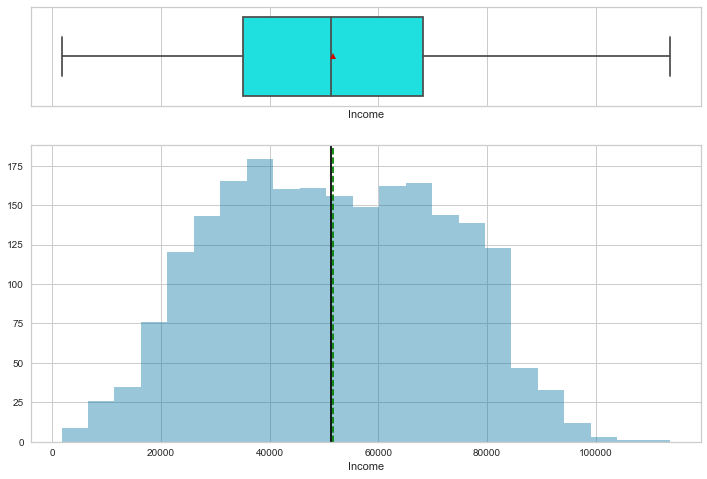

In [23]:
# Plotting Histogram and box_plot for refined Income:
histogram_boxplot(df1['Income'])

### Observations:
1. Now the histogram is almost normally distributed with mean and median lie at $50k.

Skew: 1.17


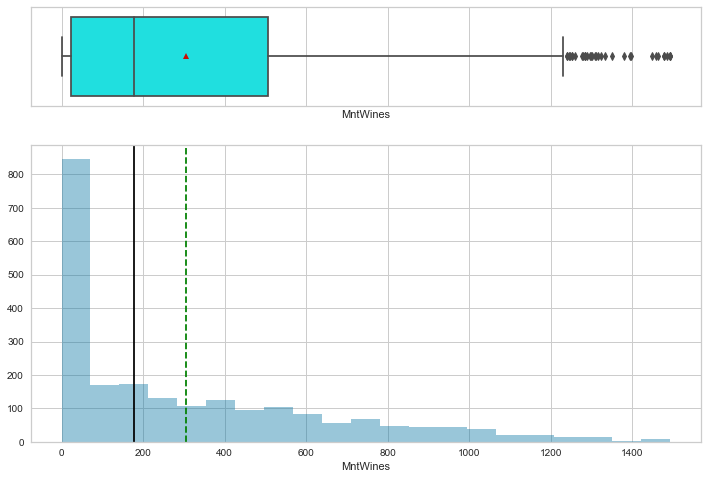

In [24]:
# Plot the histogram for 'MntWines'
histogram_boxplot(df1['MntWines'])

### Observation:
1. The boxplot is rightly skewed with multiple outliers.
2. The mean value is ~300 but the median is ~190

Skew: 2.1


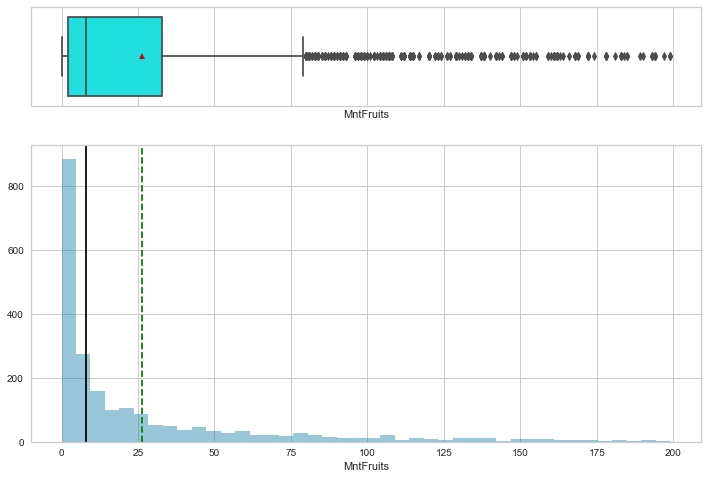

In [25]:
# Plot the histogram for 'MntFruits'
histogram_boxplot(df1['MntFruits'])

### Observations:
1. The curve is rightly skewed with multiple outliers.
2. The mean value is 25 but the median value is ~10

Skew: 1.82


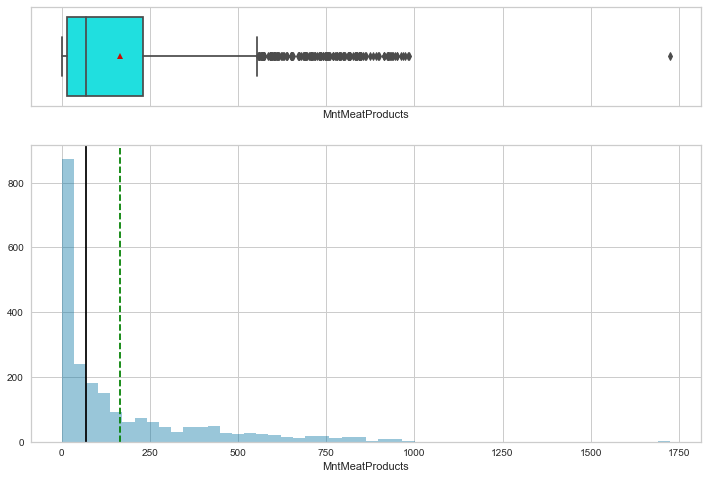

In [26]:
# Plot the histogram for 'MntMeatProducts' 
histogram_boxplot(df1['MntMeatProducts'])

In [27]:
#Removing one extreme value of MntMeatProducts to remove the one outlier
df2= df1[df1.MntMeatProducts<1000]

Skew: 1.72


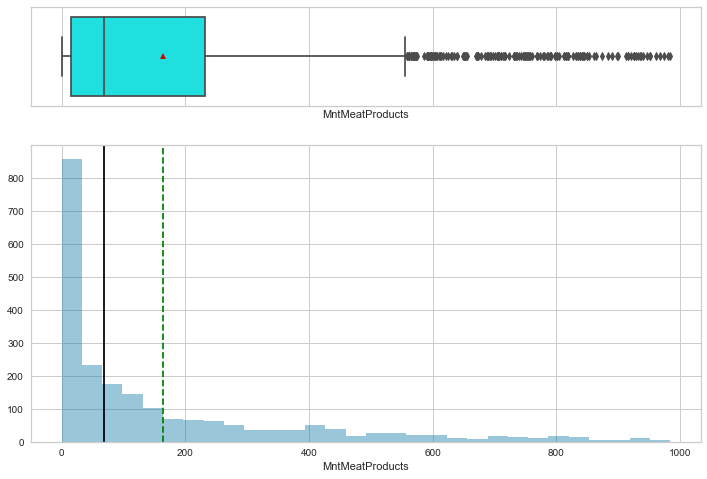

In [28]:
# Plot the histogram for 'MntMeatProducts' 
histogram_boxplot(df2['MntMeatProducts'])

### Observations:
1. The curve is righly skewed
2. The median is ~100 and the mean is ~150

Skew: 1.91


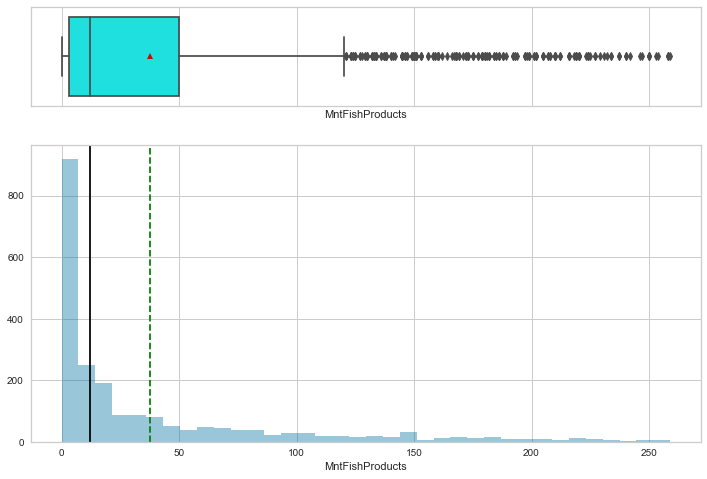

In [29]:
# Plot the histogram for 'MntFishProduct'
histogram_boxplot(df2['MntFishProducts'])

Skew: 2.1


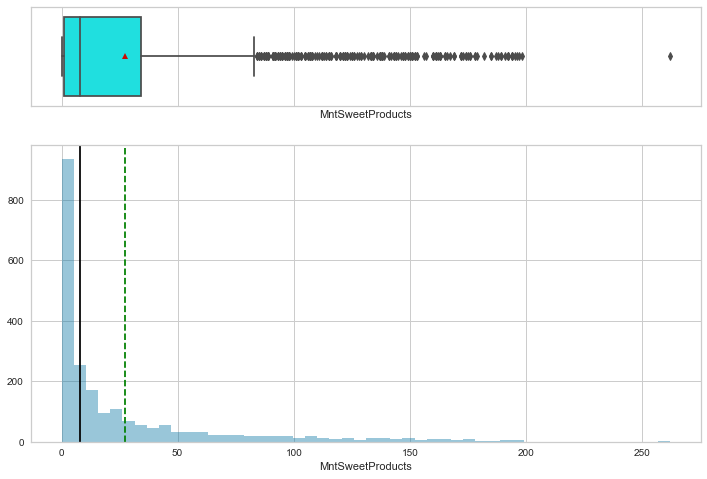

In [30]:
# Plot the histogram for 'MntSweetProducts'
histogram_boxplot(df2['MntSweetProducts'])

Skew: 1.83


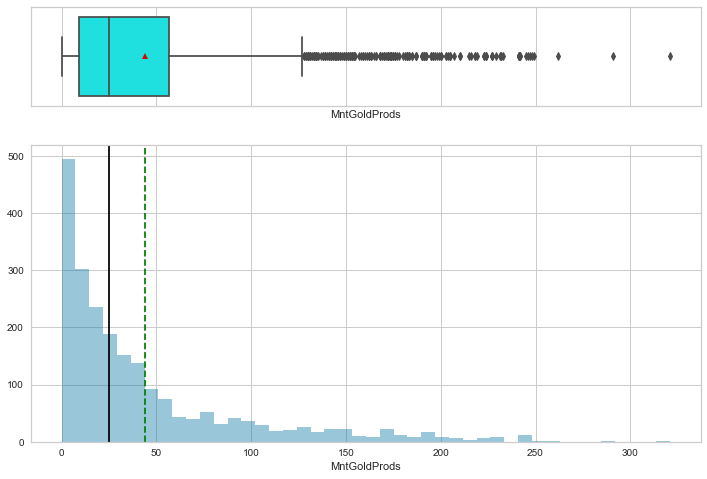

In [31]:
# Plot the histogram for 'MntGoldProds'
histogram_boxplot(df2['MntGoldProds'])

Skew: 1.2


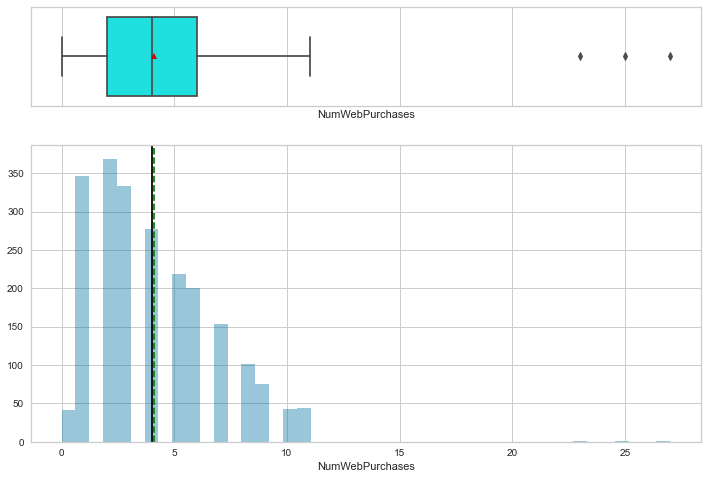

In [32]:
# Plot the histogram for 'NumWebPurchases'
histogram_boxplot(df2['NumWebPurchases'])

Skew: 0.7


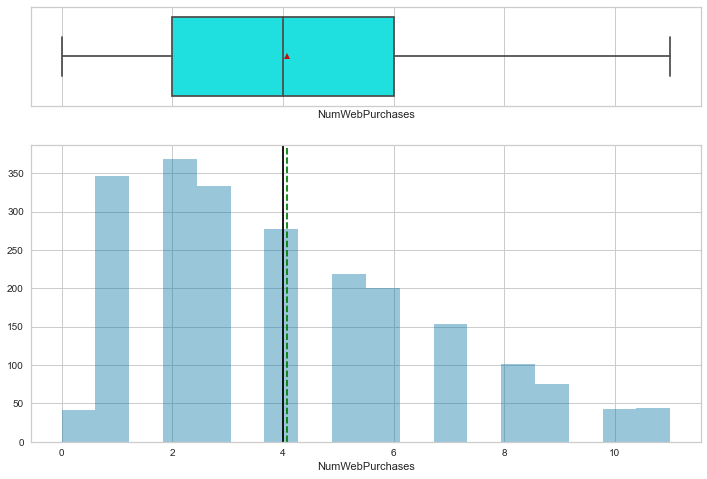

In [33]:
df2= df2[df2.NumWebPurchases<15]
histogram_boxplot(df2['NumWebPurchases'])

Skew: 1.1


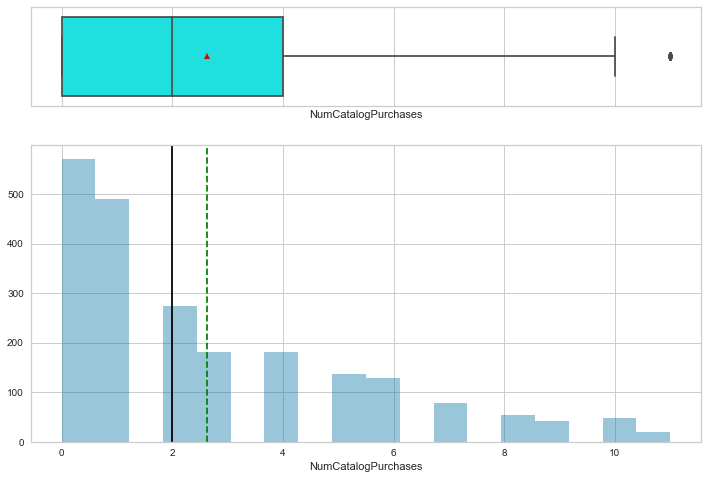

In [34]:
histogram_boxplot(df2['NumCatalogPurchases'])

Skew: 0.71


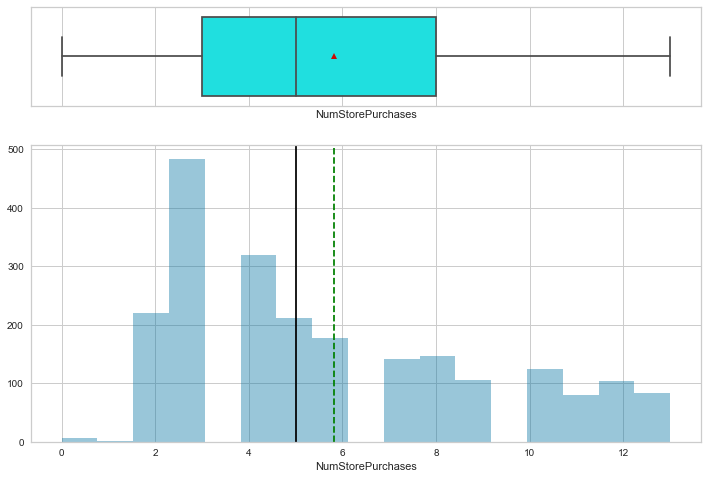

In [35]:
histogram_boxplot(df2['NumStorePurchases'])

### **2. Univariate analysis - Categorical Data**

Let us write a function that will help us create bar plots that indicate the percentage for each category. This function takes the categorical column as the input and returns the bar plot for the variable.

In [36]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + (p.get_width() / 2) - 0.2 # width of the plot
        y = p.get_y() + p.get_height() + 20          # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    #plt.show() # show the plot

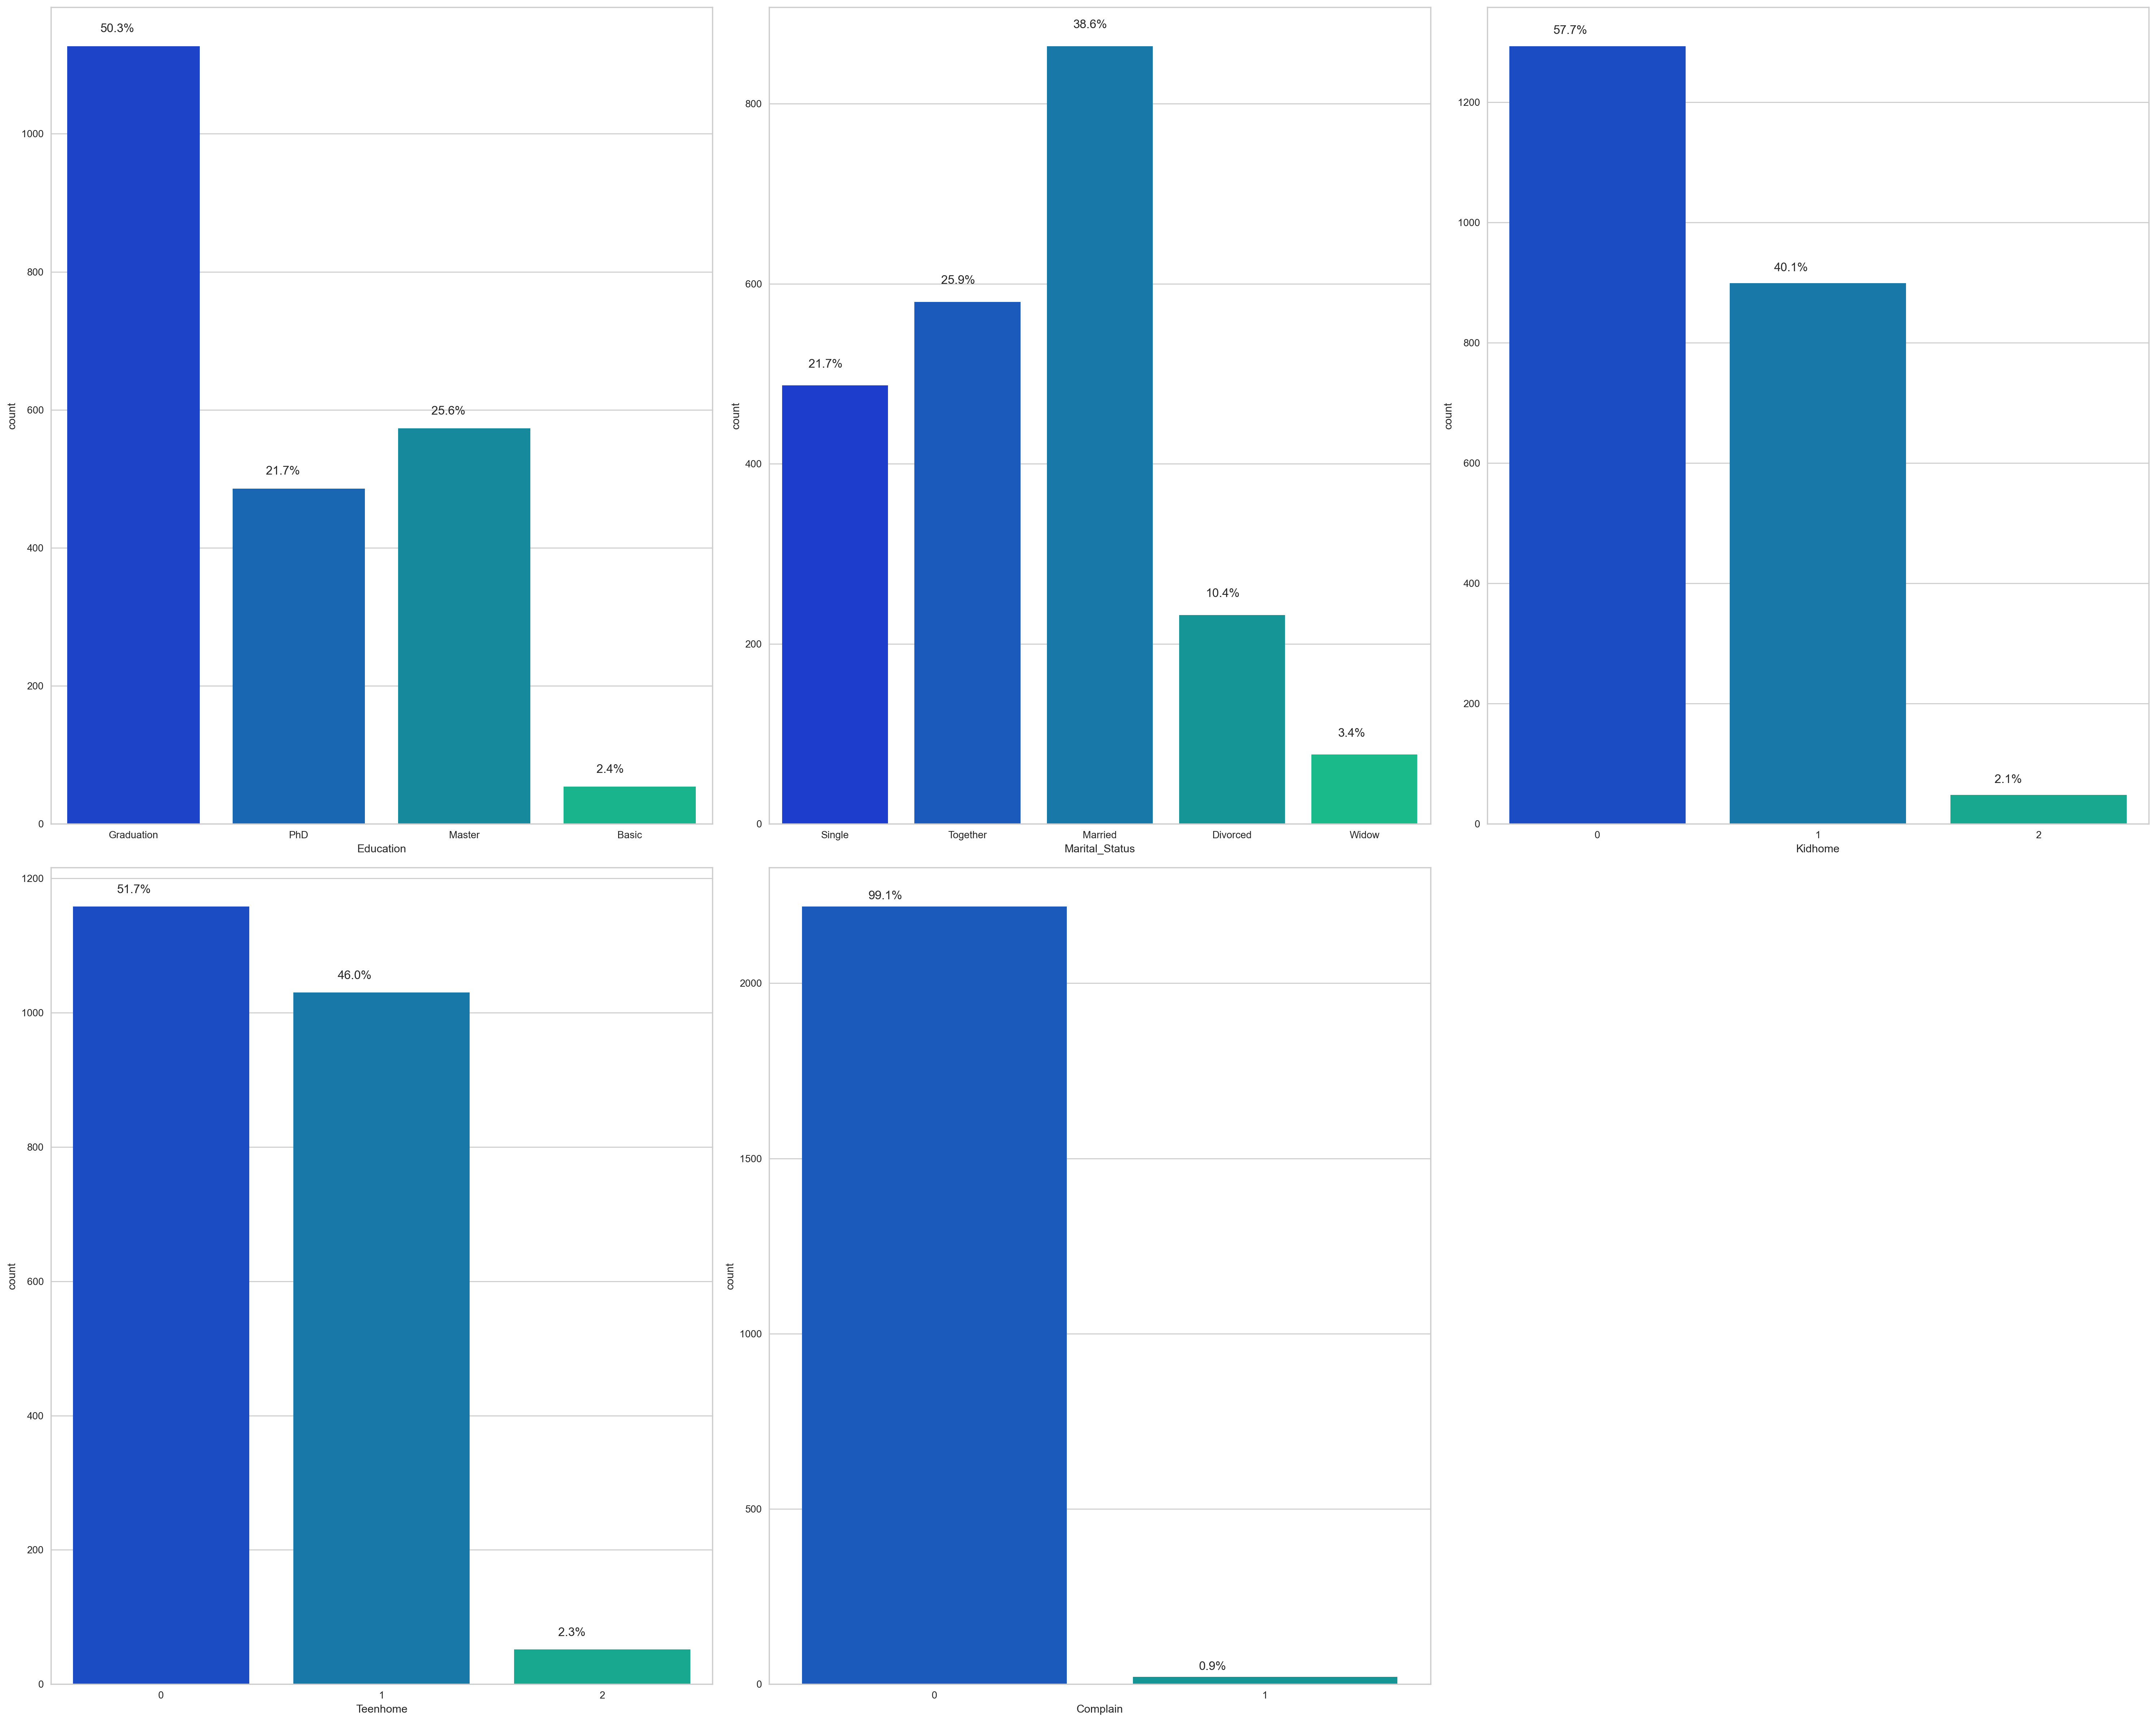

In [37]:
# Let's create all categorical plots in one go

#Create a list of categorical columns for barplot analysis
cat_cols = list(df2[cat_cols])

#Define the no. of rows and columns required to plot the variables
rows = 2
cols = 3

#Define the figure object
fig = plt.figure( figsize=(cols*10, rows*12),dpi=200)

#Loop for plotting different variables at different locations inside the plot
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows,cols,i+1) #There are 6 subplots to be added (2X3)
    plot=sns.countplot(data[col], ax = ax, palette='winter') #plot categorical data
    
    perc_on_bar(plot,data[col]) #Call function to annotate percentages on bars
    
fig.tight_layout()  
plt.show()

### Observation:
1. Majority of the customers are graduate (50%)follwed by Masters(~25%) and then PhDs.
2. 38.6% customers belong tp married category followed by people who status is together (~26%) followed by single customers(~22%)
3. 99.1% customers have not complained.

### **Bivariate Analysis**

We have analyzed different categorical and numerical variables. Now, let's check how different variables are related to each other.

**1. Between two continuous Variables** 

In [38]:
num_cols = df2.drop(['Year_Birth', 'ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response', 'Dt_Customer', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Complain'], axis= 1)
num_cols

Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0     58138.0       58       635         88              546              172   
1     46344.0       38        11          1                6                2   
2     71613.0       26       426         49              127              111   
3     26646.0       26        11          4               20               10   
4     58293.0       94       173         43              118               46   
...       ...      ...       ...        ...              ...              ...   
2235  61223.0       46       709         43              182               42   
2236  64014.0       56       406          0               30                0   
2237  56981.0       91       908         48              217               32   
2238  69245.0        8       428         30              214               80   
2239  52869.0       40        84          3               61                2   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                   88            88                  3                8   
1                    1             6                  2                1   
2                   21            42                  1                8   
3                    3             5                  2                2   
4                   27            15                  5                5   
...                ...           ...                ...              ...   
2235               118           247                  2                9   
2236                 0             8                  7                8   
2237                12            24                  1                2   
2238                30            61                  2                6   
2239                 1            21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
0                      10                  4                  7  
1                       1                  2                  5  
2                       2                 10                  4  
3                       0                  4                  6  
4                       3                  6                  5  
...                   ...                ...                ...  
2235                    3                  4                  5  
2236                    2                  5                  7  
2237                    3                 13                  6  
2238                    5                 10                  3  
2239                    1                  4                  7  

[2204 rows x 13 columns]

<Figure size 5000x5000 with 0 Axes>

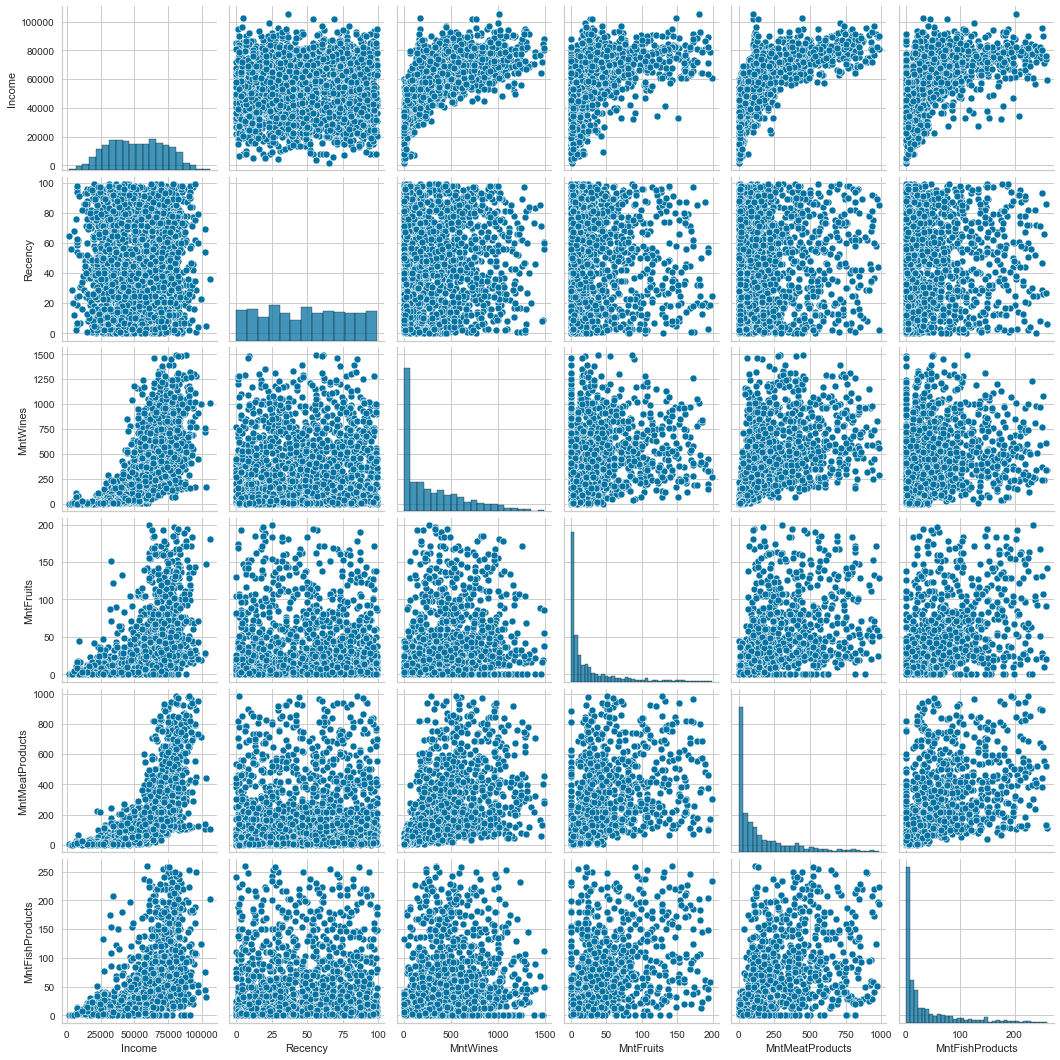

In [39]:
# Create slices of original dataframe having only continuous variables
#num_cols = df2.drop(['Year_Birth', 'ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response', 'Dt_Customer', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','Complain'], axis= 1)
df_con1=num_cols.iloc[:,:6]
df_con2=num_cols.iloc[:,6:]

# Let's create pairplots of continuous variables for these sliced dataframes one by one 
# so that we aren't bombarded with too many pairplots at once 
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con1);

### Insights:
1. Some pattern was found between Income variable and MntWines, MntMeatProducts, NumCatalogPurchases and NumStorePurchases.

<Figure size 5000x5000 with 0 Axes>

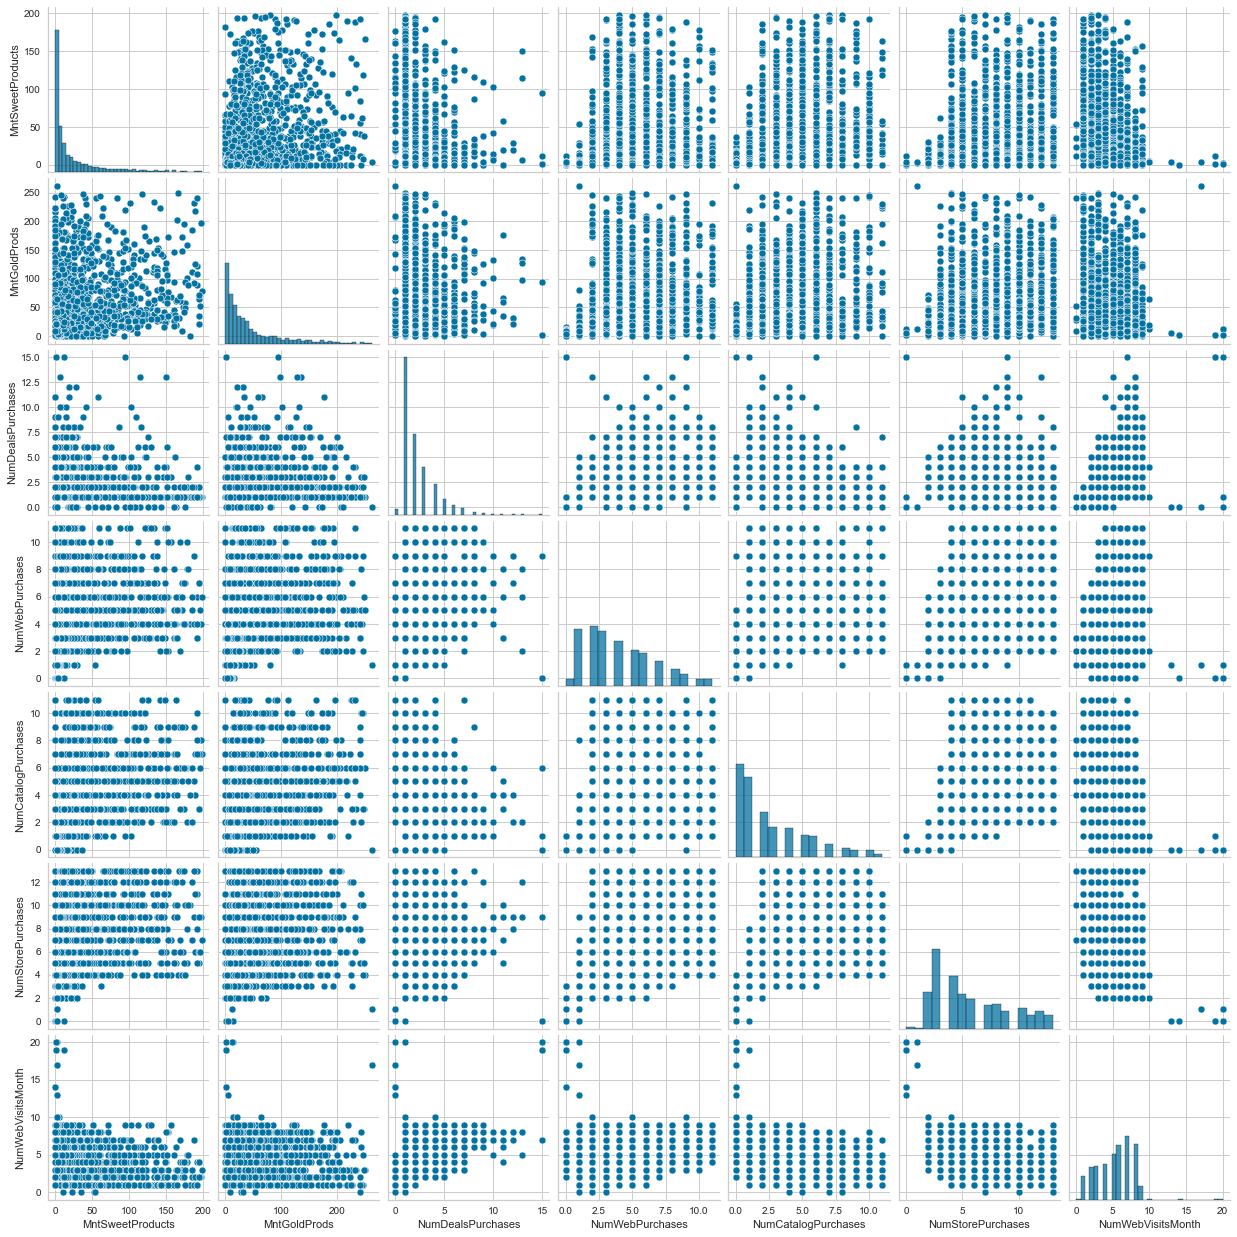

In [40]:
plt.figure(figsize=(25,25),dpi=200)
sns.pairplot(df_con2)

2. **Correlation Heatmap between two numerical columns**

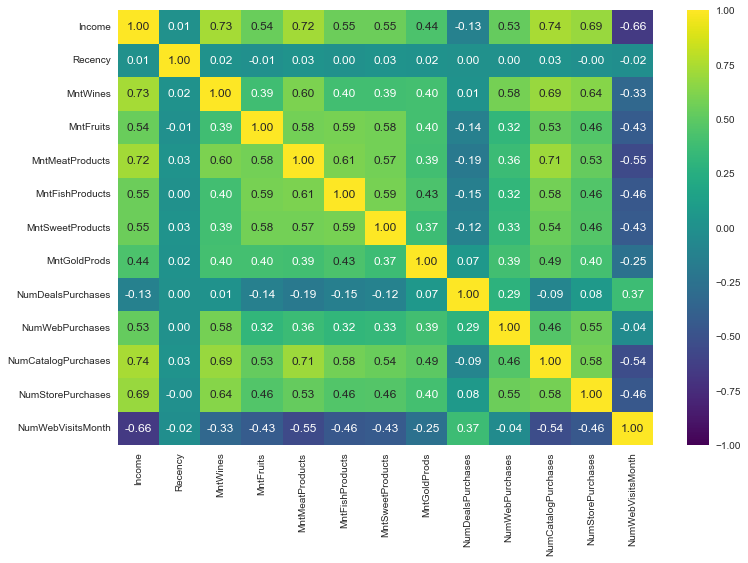

In [41]:
# Build correlation matrix for numerical columns
corr = num_cols.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='viridis',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True);

### Observations:
1. There is a very high correlation found between Income and the attributes such as MntWines, MntMeatProducts, NumCatalogPurchases and NumStorePurchases. 
2. There si also a correlation found between MntMeatProducts and NumCatalogPurchases

**3. Relationship between numerical variables with categorical variables**

### **Education Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


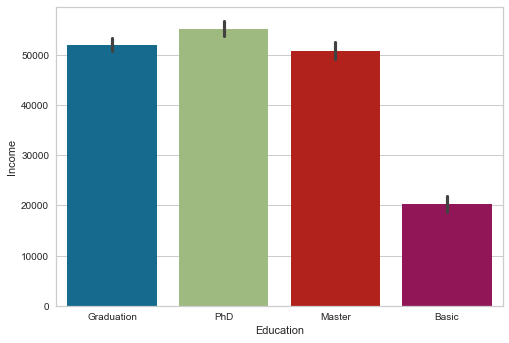

In [42]:
print(sns.barplot(x=df2.Education, y=df2.Income, data=df2))

### Observation:


### **Marital Status Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


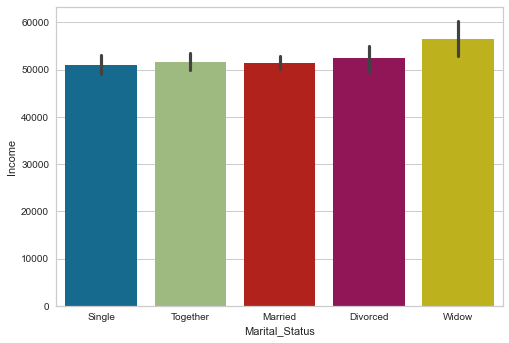

In [43]:
# Plot the bar plot for Marital_Status and Income
print(sns.barplot(x=df2.Marital_Status, y=df2.Income, data=df2))

### Observations:

### **Kidhome Vs Income**

AxesSubplot(0.125,0.125;0.775x0.755)


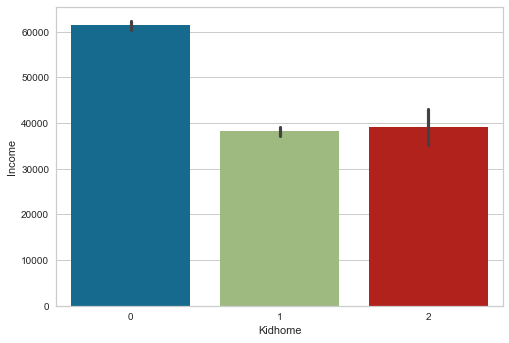

In [44]:
# Plot the bar plot for Kidhome and Income
print(sns.barplot(x=df2.Kidhome, y=df2.Income, data=df2))

### Observation:

### **Marital_Status Vs Kidhome** (Between two catgorical variables)

<AxesSubplot:xlabel='Kidhome'>

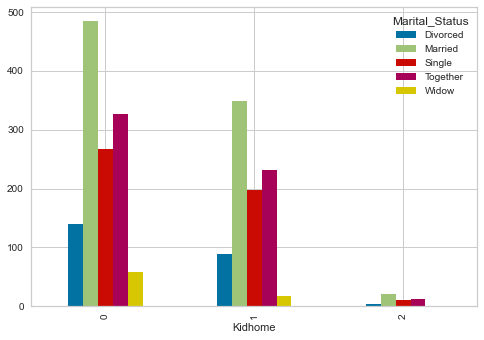

In [45]:
# Plot the bar plot for Marital_Status and Kidhome
pd.crosstab(df2.Kidhome,df2.Marital_Status).plot(kind='bar',stacked=False)

### Observations:
1. Customer having marital status as married are heighest in numbers in all the three categries of children (no child, one chid and two child). Next comes the no of customers who are 'together'.

### Feature Engineering and Data Processing
    In this section, we will first prepare our dataset for analysis.

1. Creating new columns
2. Imputing missing values

### a. Creating Age column from Date of Birth column

In [46]:
# Extract only the year from the Year_Birth variable and subtracting it from 2016 will give us the age of the customer at the time of data collection in 2016

df2["Age"] = 2016 - pd.to_datetime(df2.Year_Birth, format="%Y").apply(lambda x: x.year)                                        

In [47]:
df2[df2.Age>115]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900    Master       Divorced  36640.0        1         0   
239  11004        1893    Master         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
192  26-09-2013       99        15  ...                  2                  5   
239  17-05-2014       23         8  ...                  2                  4   
339  26-09-2013       36       755  ...                  4                  1   

     AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
192             0             0             0             0             0   
239             0             0             0             0             0   
339             0             0             1             0             0   

     Complain  Response  Age  
192         1         0  116  
239         0         0  123  
339         0         0  117  

[3 rows x 28 columns]

### Observations:
1. Some values of Age columns are having values 116 years etc which ar ethe outliers we will drop these entries.

###  b. Creating **Kids** Column
* Let's create a new feature "Kids" indicating the total kids and teens in the home.

In [48]:
# Add Kidhome and Teenhome variables to create the new feature called "Kids"
df2["Kids"] = df2.Kidhome + df2.Teenhome

### c. Creating Family Size Column
Let's create a new variable called 'Family Size' to find out how many members each family has.
For this, we need to have a look at the Marital_Status variable, and see what are the categories.

#### Check the unique categories in Marial_Status
* We can combine the sub-categories Single, Divorced, Widow as "Single" and we can combine the sub-categories Married and Together as "Relationship" 
* Then we can create a new variable called "Status" and assign values 1 and 2 to categories Single and Relationship, respectively.
* Then, we can use the Kids (calculated above) and the Status column to find the family size.


In [49]:
# Replace "Married" and "Together" with "Relationship"
df2["Marital_Status"].replace('Married', 'Relationship', inplace= True)
df2["Marital_Status"].replace('Together', 'Relationship', inplace= True)


In [50]:
# Replace "Divorced" and "Widow" with "Single"
df2["Marital_Status"].replace('Divorced', 'Single', inplace= True)
df2["Marital_Status"].replace('Widow', 'Single', inplace= True)


In [51]:
# Create a new feature called "Status" by replacing "Single" with 1 and "Relationship" with 2 in Marital_Status
df2["Status"] = df2['Marital_Status'].replace({'Single': 1, 'Relationship': 2})

In [52]:
# Add two variables Status and Kids to get the total number of persons in each family
df2["Family_Size"] = df2["Status"] + df2["Kids"]

### ** d. Expenses Column** 
* Let's create a new feature called "Expenses", indicating the total amount spent by the customers in various products over the span of two years.

In [53]:
# Create a new feature
# Add the amount spent on each of product 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
df2["Expenses"] = df2.MntWines + df2.MntFruits + df2.MntMeatProducts + df2.MntFishProducts + df2.MntSweetProducts + df2.MntGoldProds

###  e. **Total Purchases Column**
* Let's create a new feature called "NumTotalPurchases", indicating the total number of products purchased by the customers.

In [54]:
# Create a new feature
# Add the number of purchases from each channel 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
df2["NumTotalPurchases"] = df2.NumDealsPurchases + df2.NumWebPurchases + df2.NumCatalogPurchases + df2.NumStorePurchases

### f. **Engaged in Days Column**
* Let's create a new feature called "Engaged in days", indicating how long the customer has been with the company.

In [55]:
# Converting Dt_customer variable to Python date time object
df2["Dt_Customer_Engaged"] = pd.to_datetime(df2.Dt_Customer)

In [56]:
#**Let's check the max and min of the date.**
df2.Dt_Customer_Engaged.max()

Timestamp('2014-12-06 00:00:00')

In [57]:
df2.Dt_Customer_Engaged.min()

Timestamp('2012-01-08 00:00:00')

That means the last date of enrollment has been 6th December 2014 and the first date of association of a customer is 8th Januaru 2015. Let us assume that 1st January 2015 has been the theshold for any customer to calculate their association with the company.

In [58]:
# Assigning date to the day variable
df2["day"] = "01-01-2015"                         

# Converting the variable day to Python datetime object
df2["day"] = pd.to_datetime(df2.day)              

In [59]:
# To get the engagement days with the company we subtract the two dates (Day - DT_Customer_Engaged)
df2["Engaged_in_days"] = (df2["day"] - df2["Dt_Customer_Engaged"]).dt.days   

### **TotalAcceptedCmp**
* Let's create a new feature called "TotalAcceptedCmp" that shows how many offers customers have accepted.

In [60]:
# Add all the campaign related variables to get the total number of accepted campaigns by a customer
# "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"
df2["TotalAcceptedCmp"] = df2.AcceptedCmp1 + df2.AcceptedCmp2 + df2.AcceptedCmp3 + df2. AcceptedCmp4 + df2.AcceptedCmp5 + df2.Response

### **AmountPerPurchase**
* Let's create a new feature called "AmountPerPurchase" indicating the amount spent per purchase

In [61]:
# Divide the "Expenses" by "NumTotalPurchases" to create the new feature AmountPerPurchase 
df2['AmountPerPurchase'] = df2.Expenses/ df2.NumTotalPurchases

In [62]:
#### Now, let's check the maximum value of the AmountPerPurchase.

df2["AmountPerPurchase"].max()

inf

In [63]:
# Checking whether some NumTotalPurchases values are zero or not? If zero will delete those rows.
df2.NumTotalPurchases[df2.NumTotalPurchases== 0]

981     0
1524    0
Name: NumTotalPurchases, dtype: int64

In [64]:
#Dataframe with dropped rows
df2=df2.drop(index=[981,1524],axis=0)

**Now, let's check the distribution of values in AmountPerPurchase column.**

In [65]:
# Check the summary statistics of the AmountPerPurchase variable 
df2["AmountPerPurchase"].describe().T

count    2202.000000
mean       32.661836
std        28.625134
min         0.533333
25%         9.714286
50%        23.386752
75%        45.493750
max       186.500000
Name: AmountPerPurchase, dtype: float64

Skew: 1.32


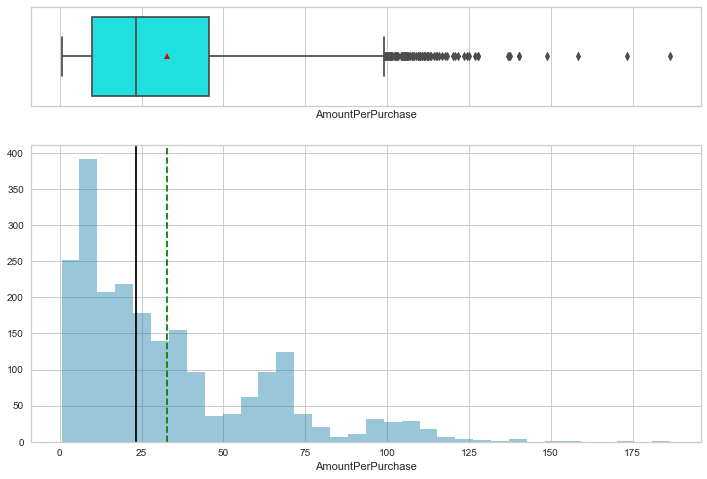

In [66]:
# Plotting histogram and box-plot:
# Plot the histogram for 'AmountPerPurchase'
histogram_boxplot(df2['AmountPerPurchase'])

### Imputing Missing Values of Income with Median

In [67]:
# Impute the missing values for the Income variable with the median
mode = df2['Income'].mode()[0]
df2.Income = df2.Income.fillna(mode)

In [68]:
#Checking the total null values in Income column
df2.Income.isnull().sum()

0

**Now that we are done with data preprocessing, let's visualize new features against the new income variable we have after imputing missing values.

#### Income Vs Expenses

Text(0, 0.5, 'Expenses')

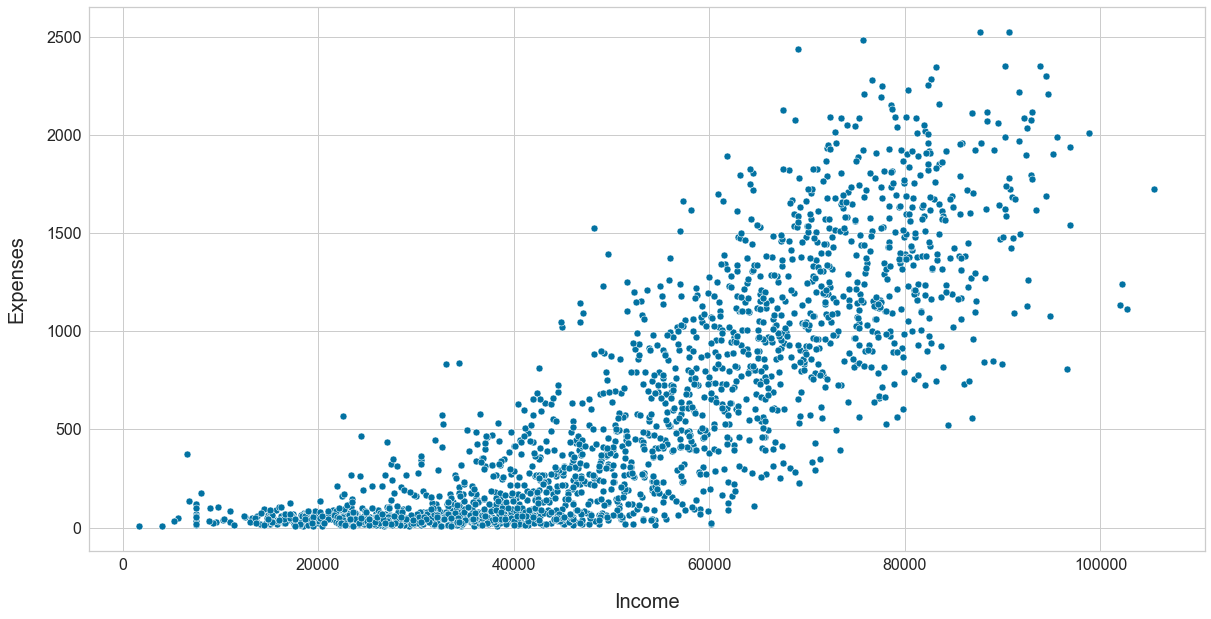

In [69]:
# Plot the scatter plot with Expenses on Y-axis and Income on X-axis  

plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(df2.Income, df2.Expenses)                       # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label

plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("Expenses", fontsize=20, labelpad=20)                # Title of Y-axis

### Observations:
1. There is a pattern observed between Income and the Expenses of a customer. With increasing Income increases the Expense of a person and vise-versa

### Family Size Vs Income

AxesSubplot(0.125,0.125;0.775x0.755)


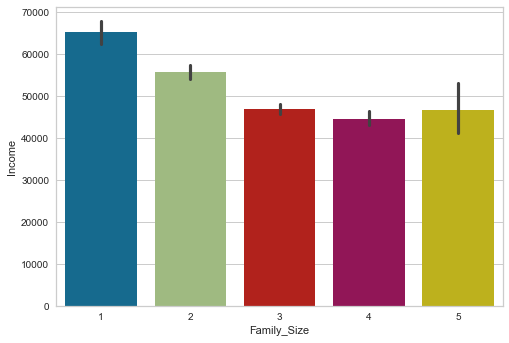

In [70]:
# Plot the Bar plot with Family Size on Y-axis and Income on X-axis
print(sns.barplot(x=df2.Family_Size, y=df2.Income, data=df2))

### Observation:

1. With increasing family size the income of a customer also declines. Hence family size iwth Income could be an important attribute to go for customer segmentation for a company.

### Proposed approach
1. Potential techniques - What different techniques should be explored?
- We can go for PCA, T-SNE, K-Means Clutering, K-Medoids 
2. Overall solution design - What is the potential solution design?
3. Measures of success - What are the key measures of success?

## Preparing Data for Segmentation or Clustering

### Dropping columns that we will not use for segmentation

We often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.

In this case also we will use the behavioral attributes for segmentation and drop the demographic attributes like Income, Age, and Family_Size. In addition to this, we need to drop some other columns which are mentioned below:
1. Dt_Customer
2. Complain
3. day
4. Status
5. All categorical variables like: Education, Family_size, Teenhome, Kidhome, Kids (As distance-based algorithms cannot use the default distance like Euclidean to find the distance between categorical and numerical variables.
6. Other categorical variables like `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, and  `Response variables will also be dropped

In [71]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2202 entries, 0 to 2239
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2202 non-null   int64         
 1   Year_Birth           2202 non-null   int64         
 2   Education            2202 non-null   object        
 3   Marital_Status       2202 non-null   object        
 4   Income               2202 non-null   float64       
 5   Kidhome              2202 non-null   int64         
 6   Teenhome             2202 non-null   int64         
 7   Dt_Customer          2202 non-null   object        
 8   Recency              2202 non-null   int64         
 9   MntWines             2202 non-null   int64         
 10  MntFruits            2202 non-null   int64         
 11  MntMeatProducts      2202 non-null   int64         
 12  MntFishProducts      2202 non-null   int64         
 13  MntSweetProducts     2202 non-nul

In [72]:
# Dropping all the irrelevant columns and storing in data_model
data_model = df2.drop(
    columns=[
        "ID",
        "Dt_Customer_Engaged",
        "Year_Birth",
        "Dt_Customer",
        "day",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Status",
        "Kids",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Family_Size'
    ],
    axis=1,
)

In [73]:
# Shape of the new refined data for modelling
data_model.shape

(2202, 17)

In [74]:
#Seeing the top 5 rows of the data: 
data_model.head(5)

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0                   10                  4                  7      1617   
1                    1                  2                  5        27   
2                    2                 10                  4       776   
3                    0                  4                  6        53   
4                    3                  6                  5       422   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0                 25              997                 1          64.680000  
1                  6              151                 0           4.500000  
2                 21              498                 0          36.952381  
3                  8               91                 0           6.625000  
4                 19              347                 0          22.210526

### Correlation plot for all the columns

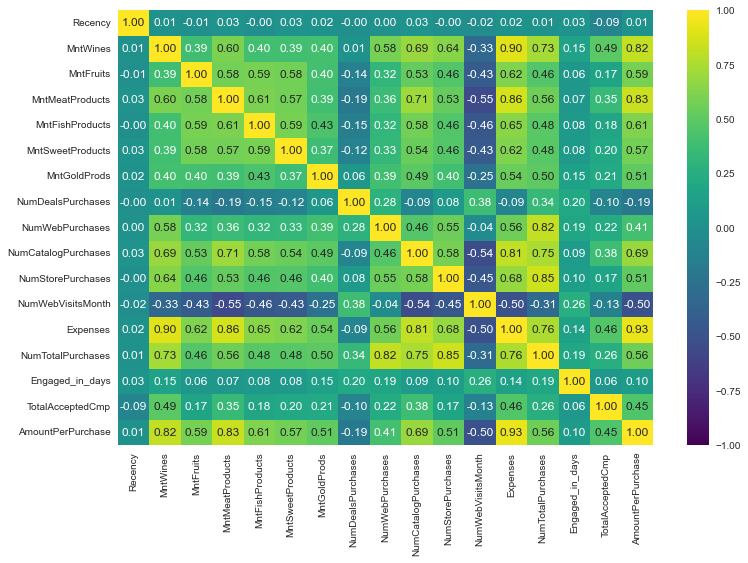

In [75]:
# Build correlation matrix for numerical columns of data set data_model:
corr = data_model.corr()

# plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap='viridis',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True);

### Observations:
1. Very very high correlation between Expenses and MntWines and Expenses and AmountPerPurchase. This could be due to the high life style and more expenditure on buying wine
2. Very High correlation between MntWine and AmountPerPurchase.
3. Very High correlation between MntMeatProduct and AmountPerPurchase.
4. Very High correlation between NumCatalogPurchase and MntMeatProduct.
5. Very High correlation between NumWebPurchase and NumTotalPurchases.
6. Very High correlation between Expenses and NumCatalogPurchase.

We have to bevery careful while using two sets of data with very high correlation while building the model.

The major point to ponder upon is when the variables are highly correlated it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables.First let us use T-SNE then we will use PCA.

### Scaling the Data

We will be using Standard Scaler here: StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance i.e. we kind of rescale the attributes so that they have a mean of 0 and a variance of 1. Unit variance means dividing all the values by the standard deviation.     

In [76]:
# Hint: Use StandardScaler()
scaler = StandardScaler()                                                  # Initialize the Standard Scaler

df_scaled = scaler.fit_transform(data_model)                                          # fit_transform the scaler function on new data

df_scaled = pd.DataFrame(df_scaled, columns=data_model.columns)      # Converting the embeddings to a dataframe

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.309558  0.972016   1.542578         1.768639         2.445946   
1 -0.382048 -0.876543  -0.639654        -0.738043        -0.653811   
2 -0.797012  0.352867   0.564336        -0.176360         1.333680   
3 -0.797012 -0.876543  -0.564404        -0.673055        -0.507940   
4  1.554450 -0.396629   0.413837        -0.218138         0.148479   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.491831      0.859118           0.366740         1.495765   
1         -0.638448     -0.740166          -0.169489        -1.172104   
2         -0.148728     -0.038042          -0.705719         1.495765   
3         -0.589476     -0.759670          -0.169489        -0.790980   
4         -0.001813     -0.564635           1.439199         0.352393   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Expenses  \
0             2.680174          -0.567664           0.695502  1.677454   
1            -0.596752          -1.186474          -0.139783 -0.963973   
2            -0.232649           1.288766          -0.557425  0.280322   
3            -0.960855          -0.567664           0.277859 -0.920780   
4             0.131454           0.051146          -0.139783 -0.307770   

   NumTotalPurchases  Engaged_in_days  TotalAcceptedCmp  AmountPerPurchase  
0           1.337542         1.973826          0.615321           1.118787  
1          -1.169967        -1.664739         -0.505387          -0.984038  
2           0.809645        -0.172325         -0.505387           0.149921  
3          -0.906019        -1.922793         -0.505387          -0.909786  
4           0.545697        -0.821762         -0.505387          -0.365192

### **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

<AxesSubplot:xlabel='0', ylabel='1'>

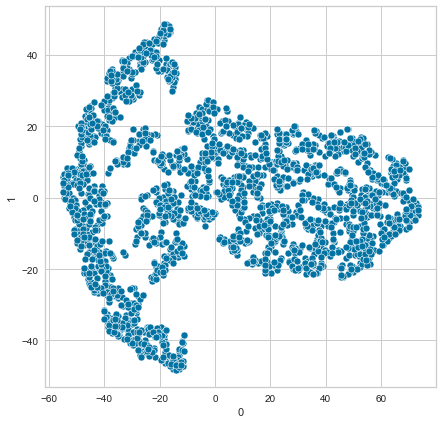

In [77]:
# Fitting T-SNE with number of components equal to 2 to visualize how data is distributed

tsne =  TSNE(n_components=2,random_state=1, perplexity=35) # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35

data_air_pol_tsne = tsne.fit_transform(data_model)                           # fit_transform T-SNE on new data

data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_air_pol_tsne)                             # Plotting T-SNE

### Observations:
1. We can see two bigger clusters in the t-SNE plot i.e. two major group of customers based on their attributes.
2. t-SNE is a useful algirithm for dimentionality reduction similar to PCA (when attributes are not linearly separable) but its    matrix is iterative i.e. t-SNE matrix can not be used further for another data set for machine learning. t-SNE would be          useful for the past custome clustering but not for the future customers. 
3. Hence, let us go for PCA whose global covariance matrix can be used for the future customer also of the company also to segregate or cluster customer based on the PCA trained model.

### **Applying PCA**

- When the variables used in clustering are highly correlated, it causes multicollinearity, which affects the clustering method and results in poor cluster profiling (or biased toward a few variables). PCA can be used to reduce the multicollinearity between the variables. 

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

We should apply PCA on the data before applying clustering algorithm so that with te reduced dimentionality matrix can be used to segment the customer based on their behaviour.

In [78]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components=2,random_state=1)                       # Initialize PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(data_model))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_  

**Let's plot the first two components and see how the data points are distributed.**

<AxesSubplot:xlabel='0', ylabel='1'>

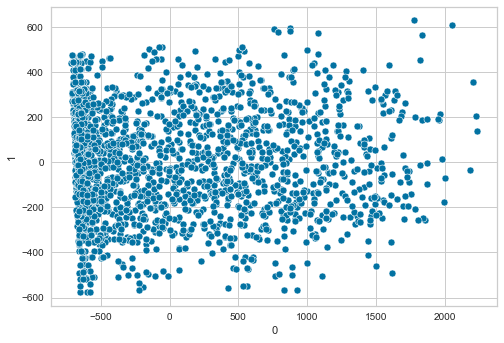

In [79]:
# Scatter plot for two components using the dataframe data_pca
sns.scatterplot(x=0, y=1, data=data_pca)                          

**Let's apply clustering algorithms on the data generated after applying PCA**

## **K-Means** 

In [80]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)                       # Append distortion values to the empty list created above

#### Plotting the Elbow plot:

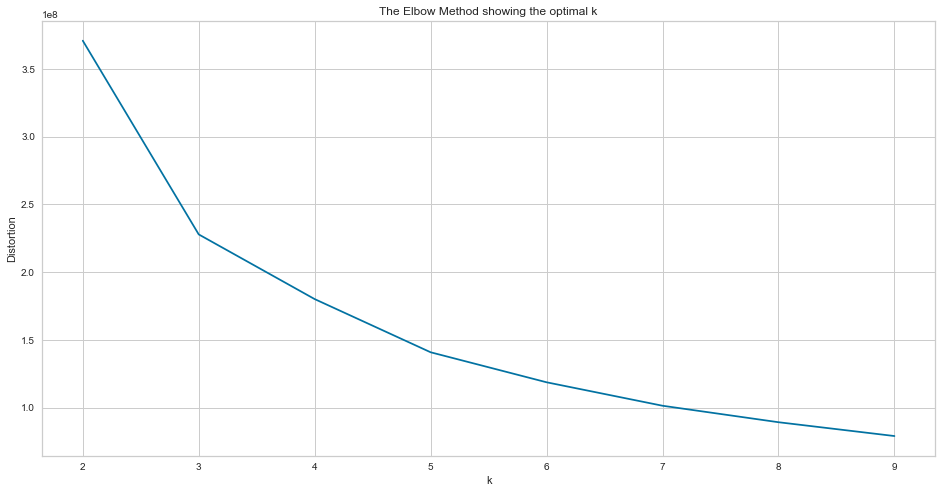

In [81]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            # Setting the plot size

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        # Title of x-axis

plt.ylabel("Distortion")                                               # Title of y-axis

plt.title("The Elbow Method showing the optimal k")                    # Title of the plot
plt.show()

**In the above plot, the elbow is seen for K=3 and K=5 as there is some drop in distortion at K=3 and K=5.**

**Think About It**

How do we determine the optimal K value when the elbows are observed at 2 or more K values from the elbow curve?
Which metric can be used to determine the final K value?

- We can use the **Silhouette Score** as a metric for different K values to make a better decision about picking the number of  clusters(K).

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means. The silhouette score is a measure of how similar an object is to its cluster (cohesion) compared to other clusters (separation). Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the clusters are dense and well separated, which is good.
* Silhouette score near -1 indicates that those samples might have been assigned to the wrong cluster.

In [82]:
#Finding silhouette score for each value of K
sil_score = []                                                             # Creating empty list
cluster_list = range(3, 7)                                                 # Creating a range from 3 to 7
for n_clusters in cluster_list:
    
    # Initialize K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    
    # Fit and predict on the pca data
    preds = clusterer.fit(data_pca)
    
    # Calculate silhouette score - Hint: Use silhouette_score() function
    score =  silhouette_score(data_pca, clusterer.predict(data_pca))
    
    # Append silhouette score to empty list created above
    sil_score.append(clusterer.inertia_)         
    
    # Print the silhouette score
    print( "For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))  

For n_clusters = 3, the silhouette score is 0.5221067073610072)
For n_clusters = 4, the silhouette score is 0.4347312839445099)
For n_clusters = 5, the silhouette score is 0.4026024250762886)
For n_clusters = 6, the silhouette score is 0.39213691793084116)


### Observations:
Based on the above silhouette score we can see that 3 appears to be a good value of K. So, let's build K-Means using K=3.

### **Applying K-Means on data_pca**

In [83]:

kmeans = KMeans(n_clusters=3,random_state=1)         # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                  # Fitting on the data_pca

KMeans(n_clusters=3, random_state=1)

In [84]:
data_pca["K_means_segments_3"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df2["K_means_segments_3"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_3"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [85]:
# Let's check the distribution
data_model["K_means_segments_3"].value_counts()

0    1227
2     597
1     378
Name: K_means_segments_3, dtype: int64

#### Observations:
The majority of point belongs to cluster 0 i.e. 1227 points

**Visualizing the clusters using PCA**

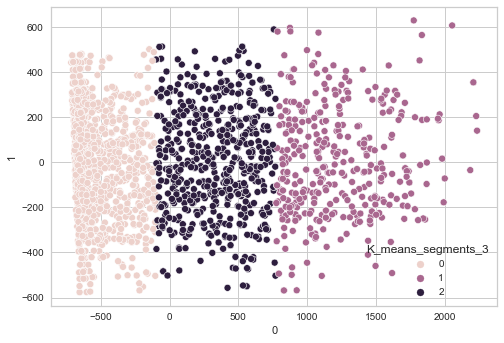

In [86]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "K_means_segments_3")

### Observations:
1. Three distinct clusters are visible in the plot with non-linear separation. Let us take cluster-wise mean of all the variables and then groupby 'df2' by 'K_means_segments_3' and then find mean of three clusters.

### Cluster Profiling

In [87]:
cluster_profile_KMeans_3= df2.groupby('K_means_segments_3').mean()

In [88]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)

In [89]:
#Let us create a boxplot for each of the variables
# Columns to use in boxplot
col_for_box = ['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Age','Family_Size','Expenses','NumTotalPurchases','Engaged_in_days','TotalAcceptedCmp','AmountPerPurchase']

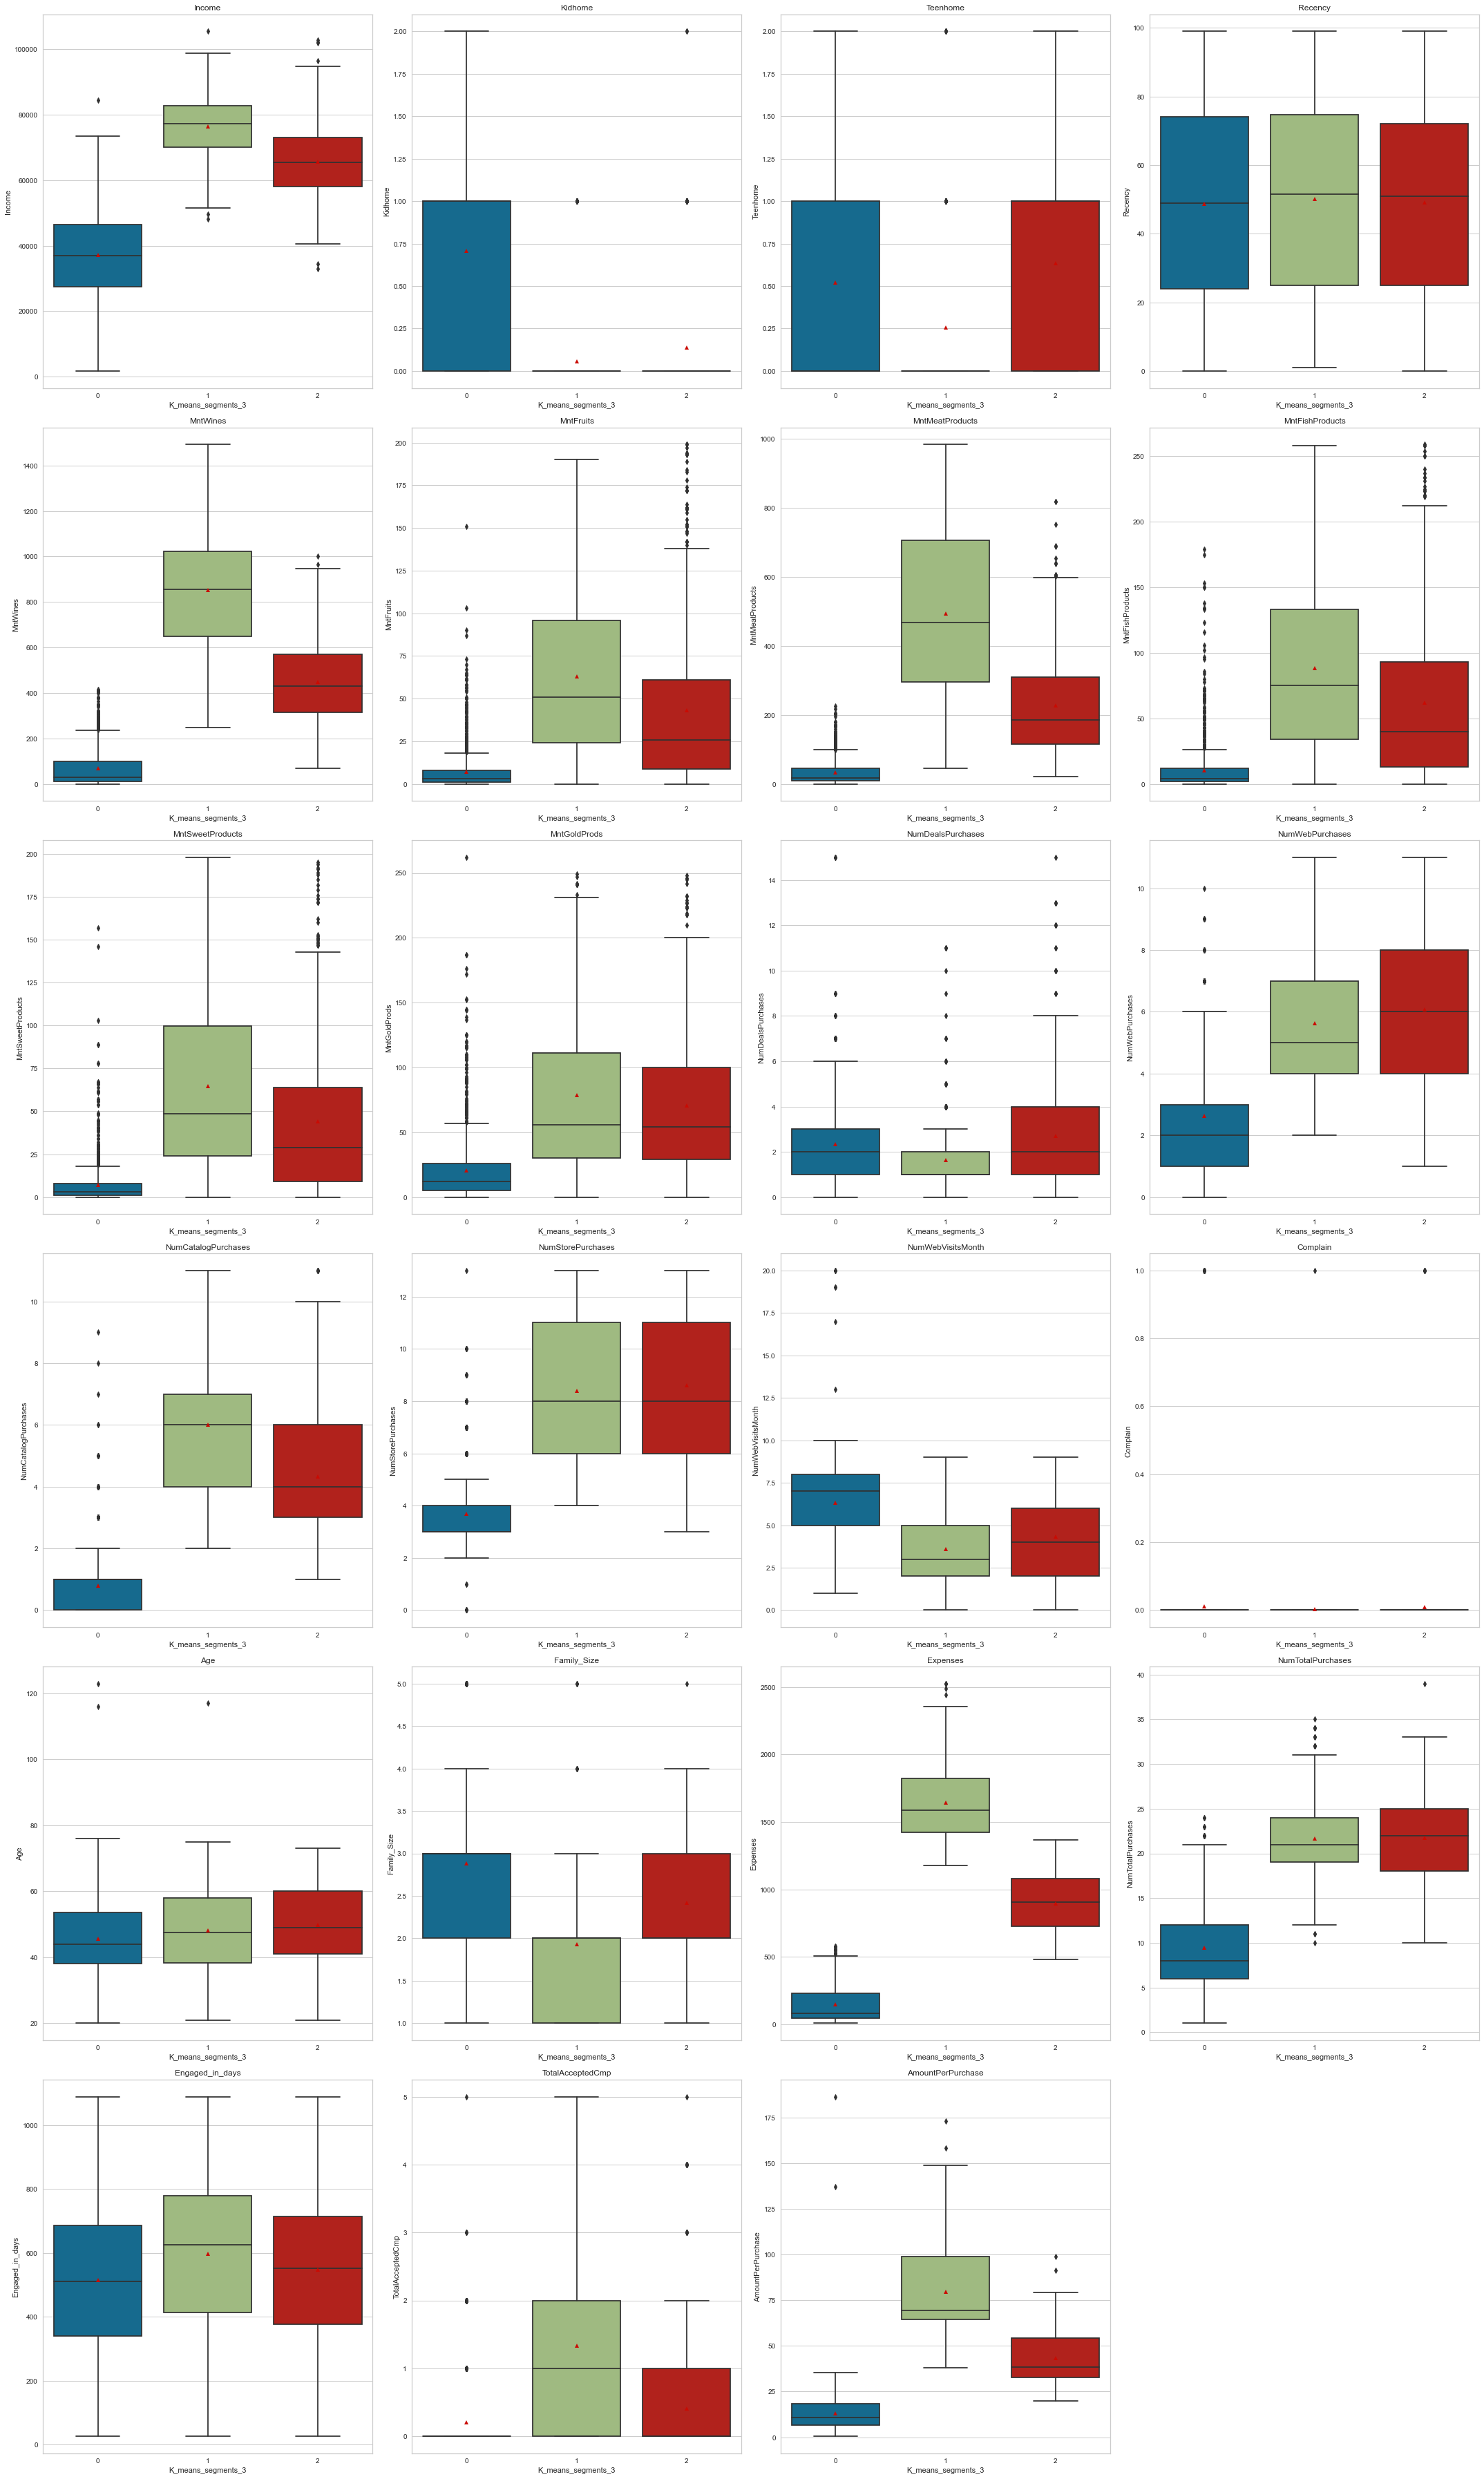

In [90]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df2[variable], x=df2['K_means_segments_3'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster:**

Cluster 0: The Blue color cluster

Summary for cluster 0:
- Mean Income is ~40k dollars
- Mean Age is 43 years
- Mean Engagement_Days 500 days
- Mean amtPerPurchase ~12-13 dollars
- Mean Expenses ~ 100 dollars
- Mean Website visit is ~6 **strange**
- Mean meat, fruit, wine, fish, gold consumption is the least in the group


Cluster 1:The Light Green color cluster

Summary for cluster 1:
- Mean Income is ~78k dollars
- Mean Age is 48 years
- Mean Engagement_Days ~630 days
- Mean amtPerPurchase ~70 dollars (highest)
- Mean Expenses ~ 1600 dollars (highest)
- Mean Website visit is ~3 (very low)- **Strange**
- Mean amount on meat, fruit and wine, fish, gold and no of catalog purchase is highest among the group.
- But the no of deals purchase and no of website purchase is lower compared to the 3rd group which is **strange** given the         smallelest family size of this group.

Cluster 2:The Red color cluster

Summary for cluster 2:
- Mean Income is ~68k dollars
- Mean Age is 50 years
- Mean Engagement_Days ~550 days
- Mean amtPerPurchase ~12-13 dollars
- Mean Expenses ~ 800 dollars
- Mean Website visit is ~3.5  **Strange**
- mean of no of total purchase is highest ~22 **strange** as website visit is lower compared to the 1st group.
- Mean meat, fruit and wine consumption is lower compared to the 2nd group


**Think About It:**
- Are the K-Means profiles with K=3 providing any deep insights into customer purchasing behavior or which channels they are using?
- What is the next step to get more meaningful insights? 

We can see from the above profiles that**K=3 segments the customers into High, Medium and Low-income customers, and we are not getting deep insights into different types of customers.** So, let's try to build K=5 (which has another elbow in the Elbow curve) and see if we can get better cluster profiles.

In [91]:
# Dropping labels we got from K=3 since we will be using PCA data for prediction
# Drop K_means_segments_3. Hint: Use axis=1 and inplace=True
data_pca.drop('K_means_segments_3', axis=1, inplace= True)
df2.drop(['K_means_segments_3', 'ID'], axis=1, inplace= True)

**Let's build K-Means using K=5**

In [92]:
# Fit the K-Means algorithm using number of cluster as 5 and random_state=0 on data_pca
kmeans = KMeans(n_clusters=5,random_state=1)         # Initialize the K-Means algorithm with 3 clusters and random_state=1

kmeans.fit(data_pca)                                  # Fitting on the data_pca

KMeans(n_clusters=5, random_state=1)

In [93]:
data_pca["K_means_segments_5"] = kmeans.labels_                    # Adding K-Means cluster labels to the data_pca data

df2["K_means_segments_5"] = kmeans.labels_                        # Adding K-Means cluster labels to the whole data

data_model["K_means_segments_5"] = kmeans.labels_                  # Adding K-Means cluster labels to data_model

In [94]:
# Let's check the distribution
data_model["K_means_segments_5"].value_counts()

3    578
0    509
2    449
4    411
1    255
Name: K_means_segments_5, dtype: int64

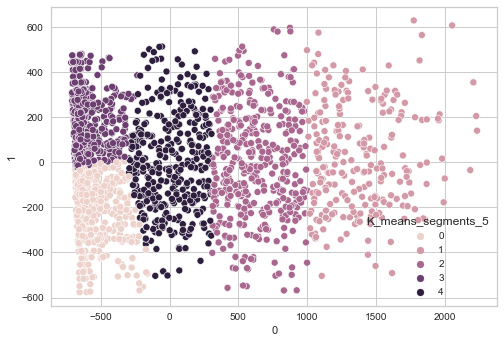

In [95]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "K_means_segments_5")

### **Cluster Profiling**

In [96]:
cluster_profile_KMeans_5= df2.groupby('K_means_segments_5').mean()
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_5.style.highlight_max(color="lightgreen", axis=0)

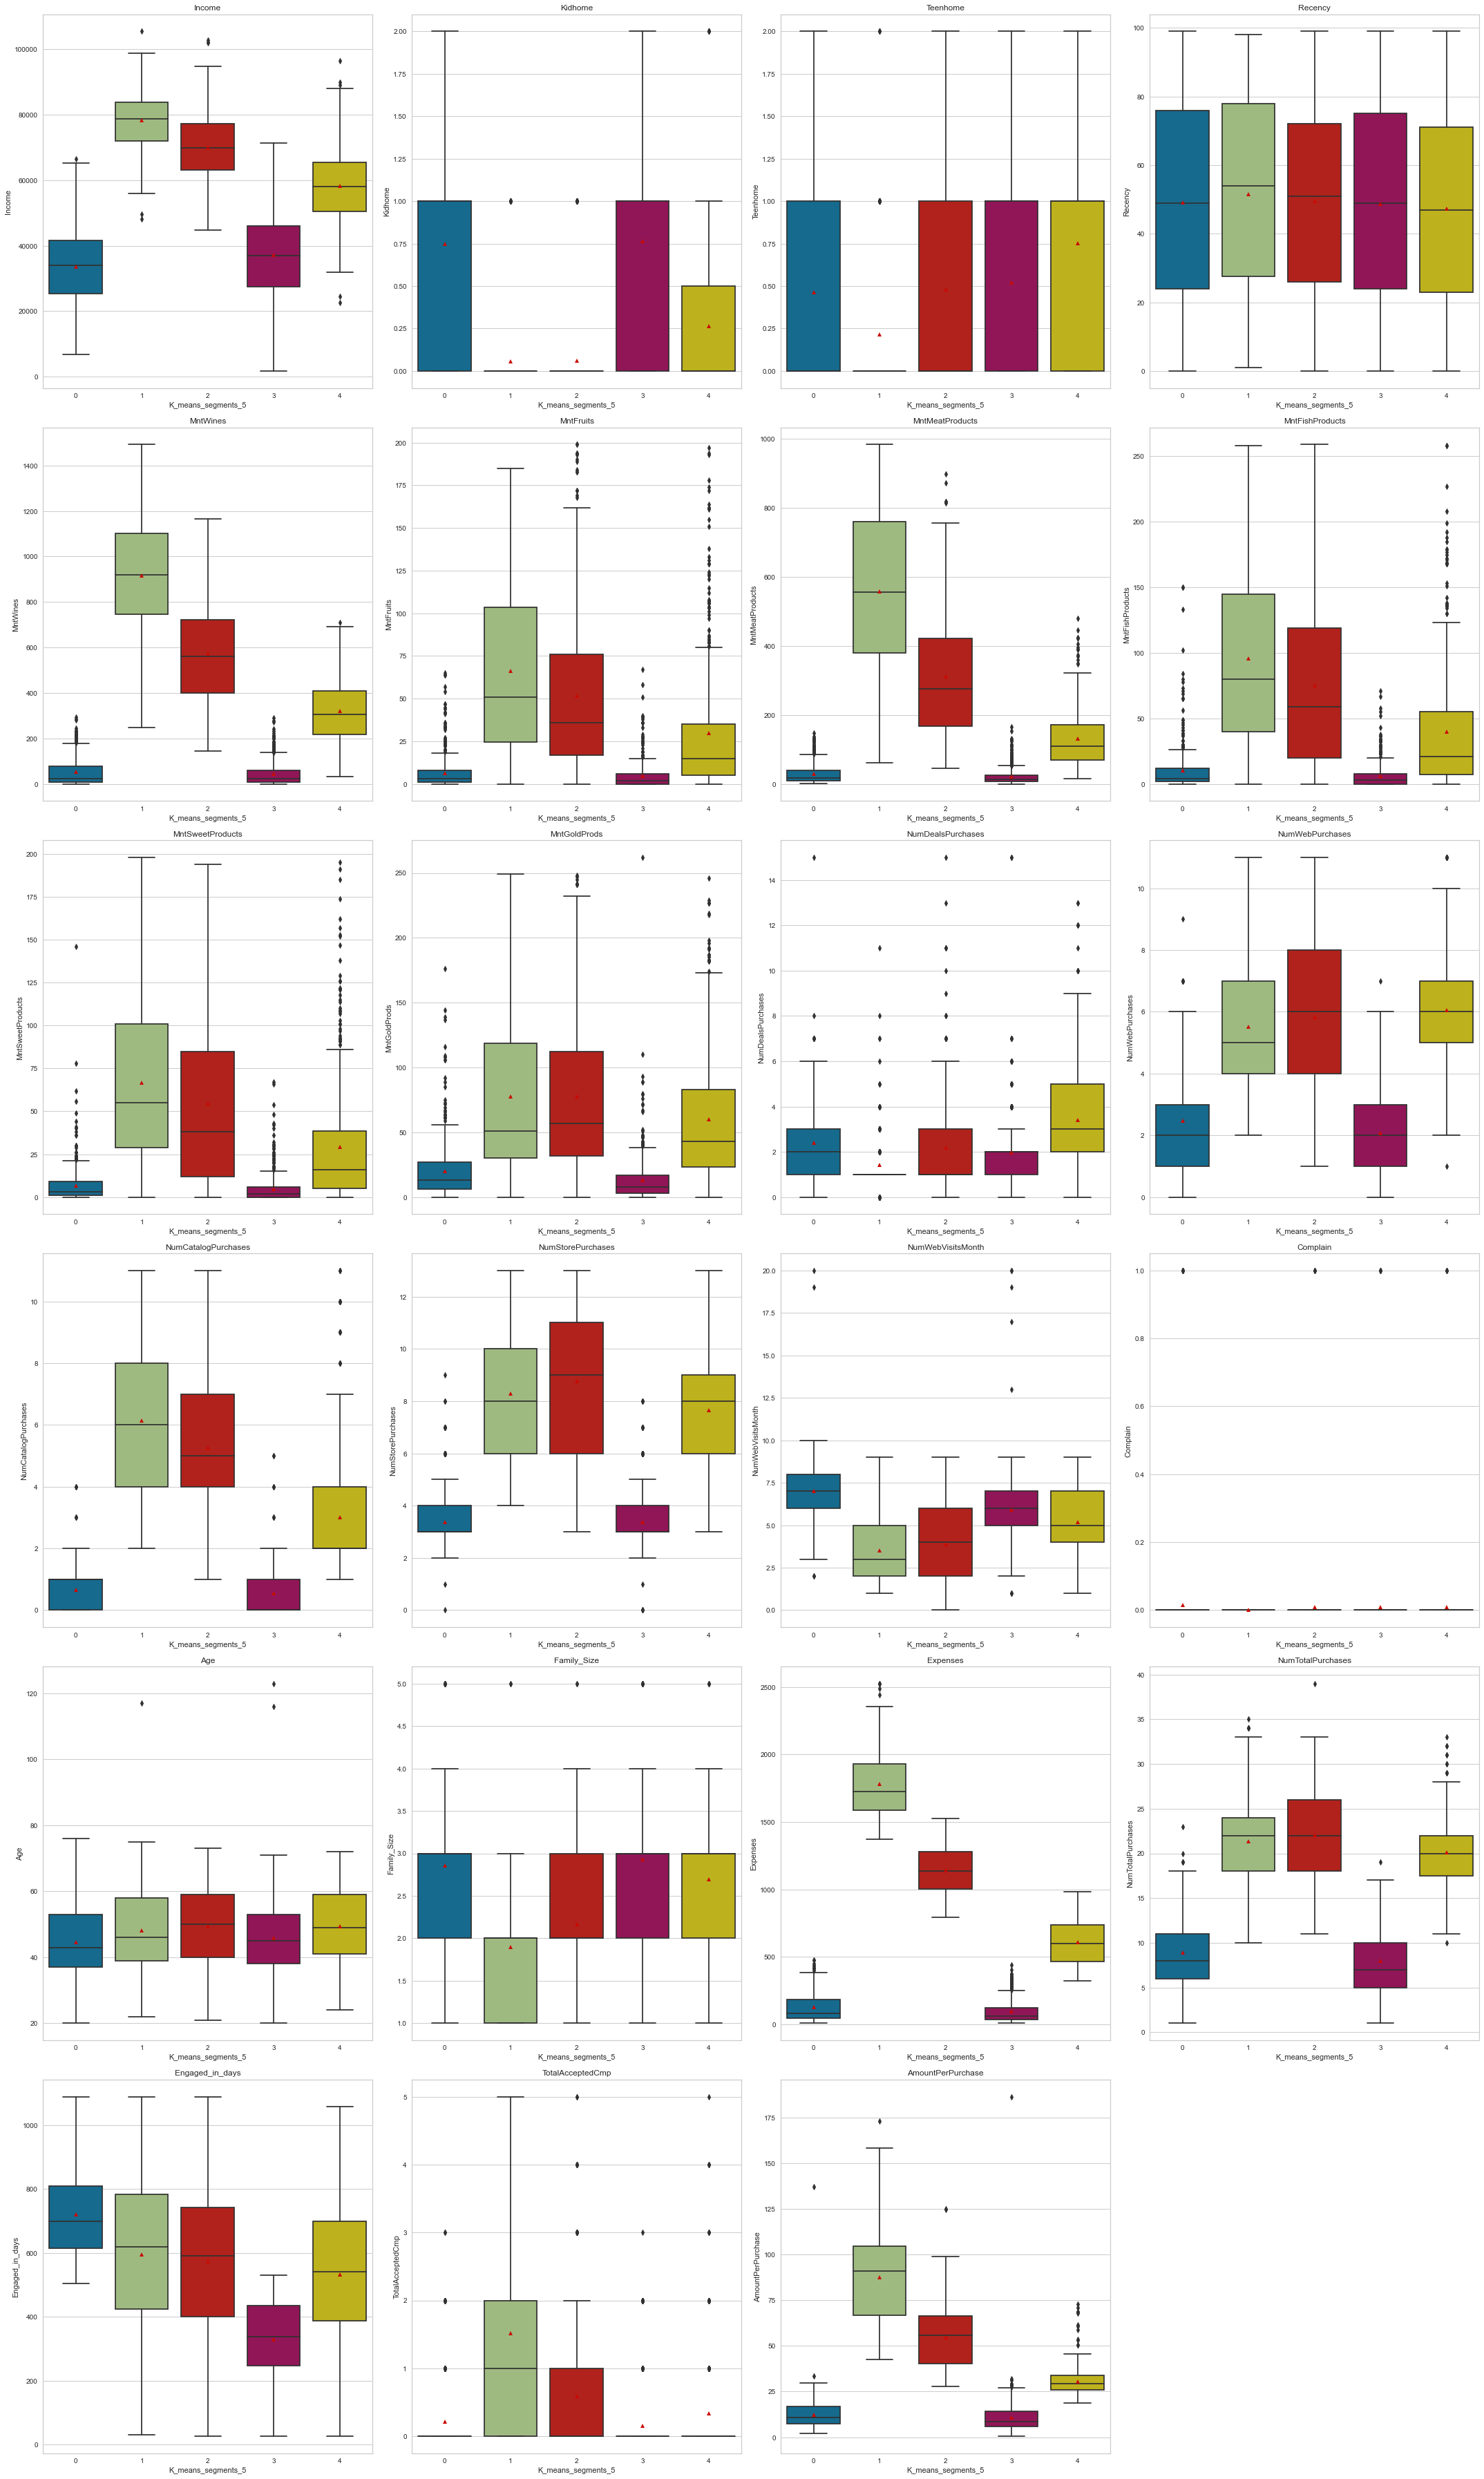

In [97]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df2[variable], x=df2['K_means_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

Cluster 0: Blue cluster

Summary for cluster 0:
- Mean Income of this group is $35k
- They are the customers who ahve been associated for the longest with the company (mean ~700 days)
- The mean of the amtwineProduct, amtMeatProduct, amtFruitsProduct, amtFishProduct, amtSweetProduct is lowest among all the       group. This could be due to the lowest expenses, lower annual income, more no of family members, lowest amount of per           purchase which could be due to the buying of essential goods which is proces lower cmpare dto the luxury goods like meat,       wine,gold, sweet etc.
- The mean of no of deal purchase is also higher for this cluster.

Cluster 1: Light Green Cluster

Summary for cluster 1:
- This is the most significant cluster to focus on with highest Mean income of $80k
- Family size is lowest i.e. the customer is single or divorced or widow with highest mean expenses
- Maximum mean mntWine, mntMeatProducts, mntFishProduct, mntFruits, mntSweetProducts, number of catalog purchase highest as       these goods are considered to be luxury good which are proes higher.
- Maximun no of mean of amount per purchase is spent by this group
- Mean no of total purchase is also highest for this group.

Cluster 2: Red Cluster

Summary for cluster 2:
- This cluster is having the highest mean age of clients (Age= ~50 Years).
- This segment is also important in the sense of having amtPerPurchase,numTotalPurchase, Expenses only after the 2nd(cluster 1)   segment.
- Number of store purchase is highest for this cluster which could be due to the older generation who is not very well versed     with the technology and wants to go to the shop to buy their products. For these customers offers could be given at stores       itself rather sending them website coupons etc.
- This cluster also buys luxury itmes as mntWine, mntMeatProducts, mntFishProduct, mntFruits, mntSweetProducts, number of         catalog purchase is only next to the 2nd group (Cluster 1).
- Due to their age group this cluster buys gold products as the mean of numGoldProducts is highest for this cluster.

Cluster 3: Magenta Cluster

Summary for cluster 3:
- In terms of Income this is just above the lowest income group customer
- It's characteristic matches with the Group 1st(Cluster 0) with lowest expenses and maximum no of website visits.
- Loswest no of store visits or catalogshopping.

Cluster 4: Yellow Cluster

Summary for cluster 4:
- This cluster is also important in terms of online presence, onine shopping, income, mntMeatProduct, mntWine, mntFishProduct,     catalog purchase, expenses and amountTotalPurchase, engagement with the company.
- This particular customer base has a presence on both website and shop purchase with significant deal shopping.

In [98]:
# Dropping labels we got from K-Means since we will be using PCA data for prediction
# Hint: Use axis=1 and inplace=True
data_pca.drop('K_means_segments_5', axis=1, inplace= True)
df2.drop(['K_means_segments_5'], axis=1, inplace= True)

## **K-Medoids**

In [99]:
kmedo = KMedoids(n_clusters=5,random_state=1)           # Initializing K-Medoids with number of clusters as 5 and random_state=1

preds = kmedo.fit(data_pca)                             # Fit and predict K-Medoids using data_pca

score = silhouette_score(data_pca, kmedo.predict(data_pca))   # Calculate the silhouette score

print(score)                                                  # Print the score

0.4057797078443841


### Observations:
The silhouette score is 0.4 which is a better score as it is towards +1.

In [100]:
# Predicting on data_pca and ddding K-Medoids cluster labels to the whole data

data_pca["K-Medoids_segments_5"] = kmedo.labels_

# Predicting on data_pca and ddding K-Medoids cluster labels to data_model

df2["K-Medoids_segments_5"] = kmedo.labels_

# Predicting on data_pca and ddding K-Medoids cluster labels to data_pca

data_model["K-Medoids_segments_5"] = kmedo.labels_

In [101]:
# Let's check the distribution
data_model["K-Medoids_segments_5"].value_counts()

0    506
1    504
2    455
4    392
3    345
Name: K-Medoids_segments_5, dtype: int64

**Let's visualize the clusters using PCA**

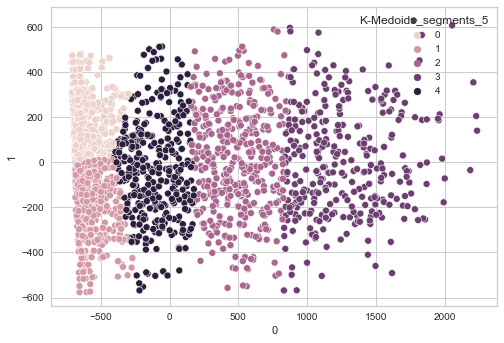

In [102]:
# Function to visualize PCA data with clusters formed
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=X, y=1, data=PCA, hue=cluster)
    
PCA_PLOT(0, 1, data_pca, "K-Medoids_segments_5")

### **Cluster Profiling**

In [103]:
# Take the cluster-wise mean of all the variables using group by function of dataframe
cluster_profile_K_Medoids_5= df2.groupby('K-Medoids_segments_5').mean()
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_K_Medoids_5.style.highlight_max(color="lightgreen", axis=0)

**Let's plot the boxplot**

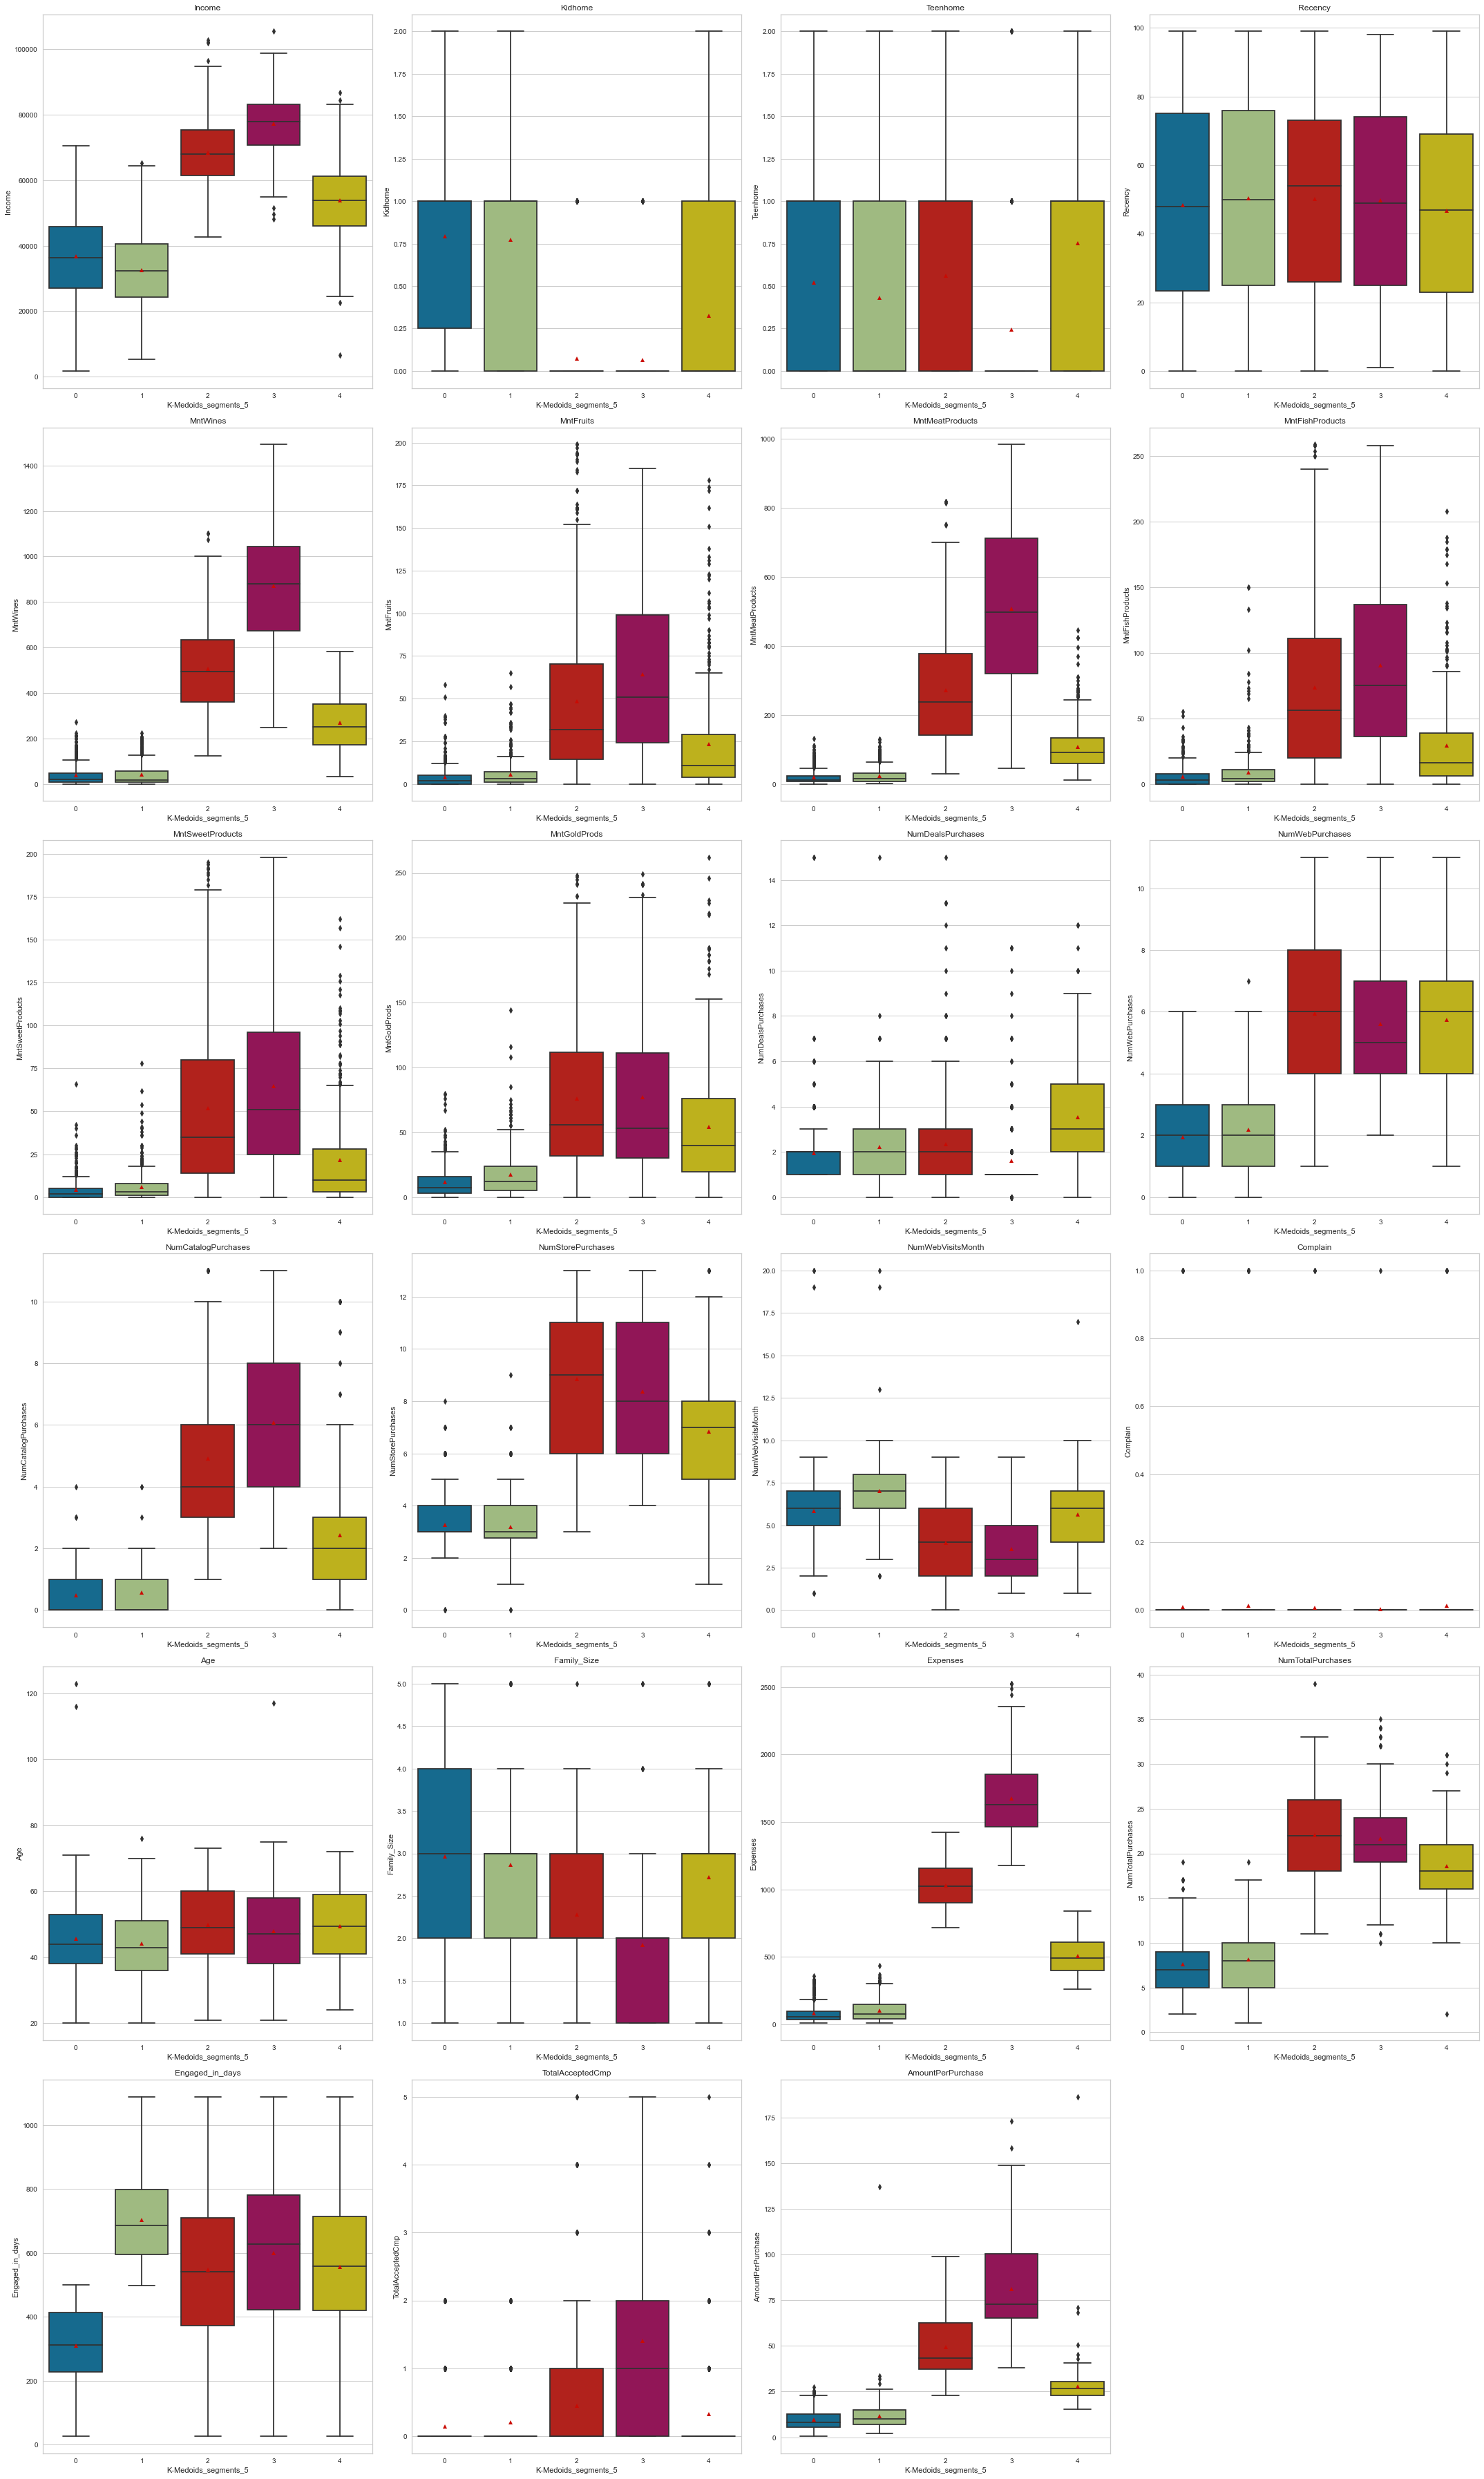

In [104]:
# Creating boxplot for each of the variables
all_col = col_for_box

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(6, 4, i + 1)
    
    sns.boxplot(y=df2[variable], x=df2['K-Medoids_segments_5'],showmeans=True)
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

### **Characteristics of each cluster**

**Cluster 0: Blue Cluster**

Summary for cluster 0
- This is the youngest cluster in terms of mean age= ~42 years
- This segment belongs to the lower Mean Income Group cluster
- This cluster is not very interested in buying itmes like Meat, gold, Fish, Fruits and Sweets.
- The number of store visits and catalogue purchase are also the least for this group of customers
- The website purchase is high for this group.
- The number of deals purchased is low for this customer group.
- Family size is highest for this customer cluster.
- This group engagement is lowest with this company.
- Mean amount per purchase and Expenses are also lowest for this cluster.

**Cluster 1: Light Green Cluster**

**Summary for cluster 1:**
- This is the youngest cluster in terms of mean age= ~41 years
- This segment also belongs to the lower Mean Income Group cluster
- The mean amount on Meat, gold, Fish, Fruits and sweets is lower for this cluster.
- The number of store visits and catalogue purchase are also the least for this group of customers
- The website purchase is highest for this group.
- The number of deals purchased is also low for this customer group.
- Mean amount per purchase and Expenses are also lowest for this cluster.
- This group engagement and no of total purchase is highest with this company.

**Cluster 2: Red Cluster** 

**Summary for cluster 2:**
- This cluster belongs to the Upper Income Slab with mean income as ~65k dollars
- The mean amount on Meat, Fish, Fruits and sweets is significant for this cluster.
- The number of store visits and catalogue purchase are also the least for this group of customers
- No of website visit per month, engagement with the company, amount per purchase and number of catalogue purchage is             significant for this group.
- No of web purchase, store purchase and amount on gold purchase is highest for this group.

**Cluster 3:Magenta Cluster** 

**Summary for cluster 3:**
- This is an important cluster in terms of mean Income, mean Expenses, mean amount per purchase, Days of engagement and     mean amount of purchase of Wine, Fruits, Meat and Sweet products.
- No of web purchase, store purchase and amount on gold purchase is significant for this group.
- No od catalogue product is highest for this group of customers.

**Cluster 4:Yellow Cluster** 

**Summary for cluster 4:**
- This cluster belongs to the middle income group customers with highest deal purchase.
- The expense and number of products bought are also moderate.
- This group has presence on both teh store and website purchase hence they can be targeted from both the ways.
- This cluster performs moderately on other attributes. Hence in terms of deals this section can directly be targeted. 

## Final Observation:

1. I will go for the last modelling which is based on the K-Medoids models.
2. This model gives interesting insights on the income clusters of the cistomer with their purchasing preferences in terms of items shopped and the usage of the traditional way of shop visits or the technology led website visits and deal purchase.